# Website Behavior Analysis - A Supervised Learning Case study

Problem:
The client is an online ecommerce player. They have shared a user level log data for their browsing behavior (Timestamp, UserId and website section visited). You have been provided with the final conversion data too (Timestamp, UserID, Products Purchased in the transaction, Overall Cart Value).

Task: Based on this data you are required to build features and model on these characteristics of users to calculate a score/rank for conversion probability of that user. These scores will eventually decide the bidding logic used for each user. Your model will be evaluated on these criteria: -
a. Feature Engineering (Variable Imputation)
b. Model Selection Criteria (Basis of choosing the final Technique)
c. Measurement Criteria (Comparison of Various Models)
d. Scope for improvement \

Data

Timestamp - Time duration of customer using the website
UserID - User if of the customer
Website_section_visited - Website sections visited by the user
Products_Purchased - Product purchased by the user
Cart_Value - cart value of each customers \
Objective:

To build a predictive regression model which predict the probability of a user buying a product, based on the characteristics of user observed from the website browsing history data.

## **Solution Approach**

1. Data Gathering 
2. Data Cleaning 
3. Feature Engineering / Feature Construction
4. Feature selection
5. Feature scaling
6. Model Building
7. Model Performance Evaluation
8. Model evaluation
9. Feature scope


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
print('Import libraries sucessfully !!')

Import libraries sucessfully !!


In [2]:
df_browsing=pd.read_csv('Problem2_Site_BrowingBehavior',delimiter='\t',header=None)
df_browsing.columns=['Timestamp', 'UserID','Website_section_visited']
df_browsing.drop_duplicates(inplace=True)

In [3]:
df_browsing.head()

,Timestamp,UserID,Website_section_visited
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


In [4]:
df_browsing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5523793 entries, 0 to 5535923
Data columns (total 3 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Timestamp                object
 1   UserID                   int64 
 2   Website_section_visited  object
dtypes: int64(1), object(2)
memory usage: 168.6+ MB


In [5]:
df_browsing.shape

(5523793, 3)

In [6]:
df_browsing['Timestamp'].unique()

array(['2017-07-26 00:01:40.965', '2017-07-26 00:03:18.448',
       '2017-07-26 00:36:59.028', ..., '2017-07-26 23:19:11.569',
       '2017-07-26 23:21:56.085', '2017-07-26 23:16:32.835'], dtype=object)

In [7]:
df_browsing.UserID.value_counts()

0                      1395827
3077341700699443780       3106
7190685980615725949        821
1215902060999829238        723
7188604889406730572        550
                        ...   
3728616176425344921          1
3732922945932323921          1
3750805740853448610          1
3752323788980638160          1
9223103337073924884          1
Name: UserID, Length: 516932, dtype: int64

In [8]:
df_browsing.isnull().sum()

Timestamp                  0
UserID                     0
Website_section_visited    0
dtype: int64

In [9]:
df_browsing.Website_section_visited.value_counts()

product                     1847953
product-listing-category     821829
home                         751095
default                      551408
content                      488322
iroa                         428241
cart                         323056
product-listing-search       262340
shoplive                      35806
productNotFound                9333
product-listing-custom         2970
signupcomplete                 1312
mys                              63
error                            60
lorigreiner                       3
wishlist                          1
category                          1
Name: Website_section_visited, dtype: int64

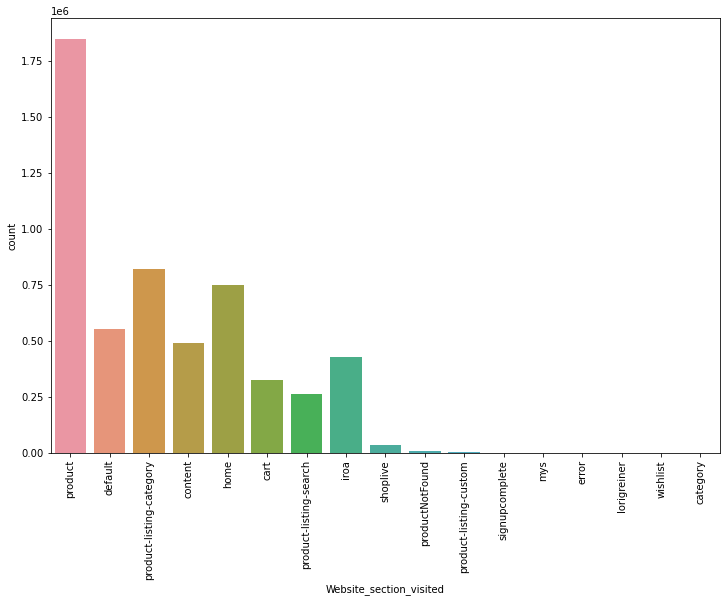

In [10]:
## Plot Website section visited
#sns.color_palette("crest", as_cmap=True)
plt.figure(figsize=(12,8))
sns.countplot(df_browsing['Website_section_visited'])
plt.xticks(rotation=90)
plt.show()


In [11]:
# number of time an account visited
site_login = df_browsing.groupby('UserID')['Website_section_visited'].agg(['count']).reindex()
site_login = site_login.reset_index()
site_login.columns = ['UserID_x','No_of_time_visited']
site_login.drop_duplicates(inplace=True)
site_login

,UserID_x,No_of_time_visited
0,0,1395827
1,2,15
2,5,2
3,342391,7
4,420372,2
...,...,...
516927,9223331925947099393,1
516928,9223332159306941752,5
516929,9223343967635174542,8
516930,9223348075878229938,5


### Read FinalConversion data

In [12]:
df_finalconversion=pd.read_csv('Problem2_FInalConversions',sep='\t',header=None)
df_finalconversion.columns=['Timestamp', 'UserID', 'Products_Purchased','Cart_Value']
df_finalconversion.drop_duplicates(inplace=True)
df_finalconversion.head()

,Timestamp,UserID,Products_Purchased,Cart_Value
0,2017-07-26 00:00:10.465,0,A293532,52.14
1,2017-07-26 00:00:12.301,0,H209597,31.50
2,2017-07-26 00:00:12.388,0,H211370,30.48
3,2017-07-26 00:00:14.389,0,A282331,51.00
4,2017-07-26 00:00:16.837,0,H211410,16.74


In [13]:
df_finalconversion.shape

(79694, 4)

In [14]:
df_finalconversion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79694 entries, 0 to 79794
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           79694 non-null  object 
 1   UserID              79694 non-null  int64  
 2   Products_Purchased  79694 non-null  object 
 3   Cart_Value          79694 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.0+ MB


In [15]:
df_finalconversion.UserID.value_counts()

0                      20185
6999042003656970156       31
559346213618742389        22
1536590739380574003       20
9050159186422090402       19
                       ...  
8423897772245735599        1
8319355192124031198        1
7863684459786431722        1
7806067101814252506        1
9174973170462435039        1
Name: UserID, Length: 41009, dtype: int64

In [16]:
df_finalconversion.Products_Purchased.value_counts()

K45766                                     6193
H211394                                    5142
H211370                                    4874
A293532                                    4797
H211397                                    1430
                                           ... 
A294544,A294544                               1
J331462                                       1
H212082,A280394,A280394,H212082,H212082       1
E210792,E231198                               1
A296470,H211800,H210000                       1
Name: Products_Purchased, Length: 13066, dtype: int64

In [17]:
df_finalconversion.Cart_Value.value_counts()

89.96     6091
52.14     5076
44.68     2756
30.48     2201
39.72     1905
          ... 
130.18       1
139.20       1
60.09        1
263.36       1
154.52       1
Name: Cart_Value, Length: 7252, dtype: int64

In [18]:
df=pd.merge(df_finalconversion,df_browsing,left_index=True,right_index=True)

In [19]:
df.head()

,Timestamp_x,UserID_x,Products_Purchased,Cart_Value,Timestamp_y,UserID_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,0,content


In [20]:
df.drop(columns=['UserID_y'],axis=1,inplace=True)

In [21]:
df

,Timestamp_x,UserID_x,Products_Purchased,Cart_Value,Timestamp_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content
...,...,...,...,...,...,...
79790,2017-07-26 23:09:08.202,9174973170462435039,K45766,89.96,2017-07-26 00:39:14.899,home
79791,2017-07-26 23:44:19.505,9179943977593655876,V34738,24.66,2017-07-26 00:39:14.909,content
79792,2017-07-26 23:53:15.661,9179943977593655876,H210000,21.64,2017-07-26 00:39:14.944,home
79793,2017-07-26 23:13:02.55,9211905364441411643,A209343,73.00,2017-07-26 00:39:15.161,product


In [22]:
df.shape

(78450, 6)

In [23]:
df.isnull().sum()

Timestamp_x                0
UserID_x                   0
Products_Purchased         0
Cart_Value                 0
Timestamp_y                0
Website_section_visited    0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78450 entries, 0 to 79794
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp_x              78450 non-null  object 
 1   UserID_x                 78450 non-null  int64  
 2   Products_Purchased       78450 non-null  object 
 3   Cart_Value               78450 non-null  float64
 4   Timestamp_y              78450 non-null  object 
 5   Website_section_visited  78450 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.2+ MB


In [25]:
df.UserID_x.value_counts()

0                      19872
6999042003656970156       30
559346213618742389        22
1536590739380574003       20
9050159186422090402       19
                       ...  
2317839966663889987        1
2270881352281344408        1
2267140736353810557        1
2178391343789308397        1
9174973170462435039        1
Name: UserID_x, Length: 40553, dtype: int64

In [26]:
df_data=df.copy()
df_data.head()

,Timestamp_x,UserID_x,Products_Purchased,Cart_Value,Timestamp_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content


# Feature Engineering

In [27]:
df['Timestamp_x']=pd.to_datetime(df['Timestamp_x'])
df['Timestamp_y']=pd.to_datetime(df['Timestamp_y'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78450 entries, 0 to 79794
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp_x              78450 non-null  datetime64[ns]
 1   UserID_x                 78450 non-null  int64         
 2   Products_Purchased       78450 non-null  object        
 3   Cart_Value               78450 non-null  float64       
 4   Timestamp_y              78450 non-null  datetime64[ns]
 5   Website_section_visited  78450 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [29]:
# Time Conversion
import datetime
from datetime import timedelta

def Time_conversion(df):
    time_delta=df['Timestamp_x']-df['Timestamp_y']
    total_seconds=time_delta.total_seconds()
    minutes=total_seconds/60
    return abs(minutes)

In [30]:
df['Time_spent_Minutes_day']=df.apply(Time_conversion,axis=1)

In [31]:
df.drop(['Timestamp_x','Timestamp_y'],axis=1,inplace=True)
df

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day
0,0,A293532,52.14,product,1.508333
1,0,H209597,31.50,product,3.102450
2,0,H211370,30.48,default,36.777333
3,0,A282331,51.00,product-listing-category,41.048067
4,0,H211410,16.74,content,45.372667
...,...,...,...,...,...
79790,9174973170462435039,K45766,89.96,home,1349.888383
79791,9179943977593655876,V34738,24.66,content,1385.076600
79792,9179943977593655876,H210000,21.64,home,1394.011950
79793,9211905364441411643,A209343,73.00,product,1353.789817


In [32]:
df_final = df.copy()
df_final.head()

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day
0,0,A293532,52.14,product,1.508333
1,0,H209597,31.50,product,3.102450
2,0,H211370,30.48,default,36.777333
3,0,A282331,51.00,product-listing-category,41.048067
4,0,H211410,16.74,content,45.372667


In [33]:
df.UserID_x.value_counts()

0                      19872
6999042003656970156       30
559346213618742389        22
1536590739380574003       20
9050159186422090402       19
                       ...  
2317839966663889987        1
2270881352281344408        1
2267140736353810557        1
2178391343789308397        1
9174973170462435039        1
Name: UserID_x, Length: 40553, dtype: int64

### Total money spent by user

In [34]:
## Total money spent by user
df_total_money_spent = df.groupby('UserID_x')['Cart_Value'].agg(['sum']).reindex(df['UserID_x']).reset_index()
df_total_money_spent.columns = ['UserID_x','Total_cart_value']
df_total_money_spent.drop_duplicates(inplace=True)
df_total_money_spent

,UserID_x,Total_cart_value
0,0,1354720.87
538,5942997097932061,157.95
539,23951842225160889,60.96
541,30833658052409950,216.12
542,33873861847792934,53.24
...,...,...
78440,9138020064668426621,38.68
78441,9138678094731427197,42.72
78442,9162285675244079016,104.28
78444,9168488389924043940,35.48


### Number of product purchased by user

In [35]:
## Total transactiont by user
df_total_product_purchased = df.groupby('UserID_x')['Cart_Value'].agg(['count']).reindex(df['UserID_x']).reset_index()
df_total_product_purchased.columns = ['UserID_x','Total_products_purchased']
df_total_product_purchased.drop_duplicates(inplace=True)
df_total_product_purchased

,UserID_x,Total_products_purchased
0,0,19872
538,5942997097932061,1
539,23951842225160889,2
541,30833658052409950,5
542,33873861847792934,1
...,...,...
78440,9138020064668426621,1
78441,9138678094731427197,1
78442,9162285675244079016,2
78444,9168488389924043940,1


### total time spent by each ID

In [36]:
# Total Time Stamp by each UserID
df_total_time_spent= df.groupby('UserID_x')['Time_spent_Minutes_day'].agg(['sum']).reindex(df['UserID_x']).reset_index()
df_total_time_spent.columns = ['UserID_x','Total_Time_Spent']
df_total_time_spent.drop_duplicates(inplace=True)
pd.set_option('display.float_format', lambda x:'%.3f' % x)
df_total_time_spent

,UserID_x,Total_Time_Spent
0,0,11593499.072
538,5942997097932061,0.450
539,23951842225160889,52.050
541,30833658052409950,381.190
542,33873861847792934,10.063
...,...,...
78440,9138020064668426621,1375.295
78441,9138678094731427197,1393.451
78442,9162285675244079016,2791.032
78444,9168488389924043940,1373.753


In [37]:
df.drop_duplicates(subset='UserID_x',keep='first',inplace=True)
df

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day
0,0,A293532,52.140,product,1.508
548,5942997097932061,K43931,157.950,product,0.450
549,23951842225160889,H211370,33.480,product-listing-search,26.025
551,30833658052409950,H211394,44.680,content,54.915
552,33873861847792934,H211800,53.240,product,10.063
...,...,...,...,...,...
79785,9138020064668426621,A282215,38.680,product-listing-category,1375.295
79786,9138678094731427197,A280809,42.720,iroa,1393.451
79787,9162285675244079016,A293532,52.140,product,1394.944
79789,9168488389924043940,K45797,35.480,product,1373.753


In [38]:
df = df_final

In [39]:
df_final = df.copy()
df_final.head()

,UserID_x,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day
0,0,A293532,52.140,product,1.508
1,0,H209597,31.500,product,3.102
2,0,H211370,30.480,default,36.777
3,0,A282331,51.000,product-listing-category,41.048
4,0,H211410,16.740,content,45.373


In [40]:
## Merge all datasets
df_final = pd.merge(df,site_login,left_index=True,right_index=True)

In [41]:
df_final

,UserID_x_x,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day,UserID_x_y,No_of_time_visited
0,0,A293532,52.140,product,1.508,0,1395827
1,0,H209597,31.500,product,3.102,2,15
2,0,H211370,30.480,default,36.777,5,2
3,0,A282331,51.000,product-listing-category,41.048,342391,7
4,0,H211410,16.740,content,45.373,420372,2
...,...,...,...,...,...,...,...
79790,9174973170462435039,K45766,89.960,home,1349.888,1424424757549936033,10
79791,9179943977593655876,V34738,24.660,content,1385.077,1424444260884064148,5
79792,9179943977593655876,H210000,21.640,home,1394.012,1424484491624274996,2
79793,9211905364441411643,A209343,73.000,product,1353.790,1424497012413795885,1


In [42]:
df_final=pd.merge(df_final,df_total_product_purchased,left_index=True,right_index=True)
df_final.head()

,UserID_x_x,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day,UserID_x_y,No_of_time_visited,UserID_x,Total_products_purchased
0,0,A293532,52.140,product,1.508,0,1395827,0,19872
538,0,H211394,44.680,cart,58.924,8593259333908315,1,5942997097932061,1
539,0,H211394,44.680,product-listing-category,58.935,8663076493874552,20,23951842225160889,2
541,0,H211370,27.480,default,58.929,8789988856990852,1,30833658052409950,5
542,0,H211394,44.680,cart,58.967,8791390280259404,1,33873861847792934,1


In [43]:
df_final=pd.merge(df_final,df_total_money_spent,left_index=True,right_index=True)
df_final.head()

,UserID_x_x,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day,UserID_x_y,No_of_time_visited,UserID_x_x,Total_products_purchased,UserID_x_y,Total_cart_value
0,0,A293532,52.140,product,1.508,0,1395827,0,19872,0,1354720.870
538,0,H211394,44.680,cart,58.924,8593259333908315,1,5942997097932061,1,5942997097932061,157.950
539,0,H211394,44.680,product-listing-category,58.935,8663076493874552,20,23951842225160889,2,23951842225160889,60.960
541,0,H211370,27.480,default,58.929,8789988856990852,1,30833658052409950,5,30833658052409950,216.120
542,0,H211394,44.680,cart,58.967,8791390280259404,1,33873861847792934,1,33873861847792934,53.240


In [44]:
df_final=pd.merge(df_final,df_total_time_spent,left_index=True,right_index=True)
df_final.head()

,UserID_x_x,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day,UserID_x_y,No_of_time_visited,UserID_x_x,Total_products_purchased,UserID_x_y,Total_cart_value,UserID_x,Total_Time_Spent
0,0,A293532,52.140,product,1.508,0,1395827,0,19872,0,1354720.870,0,11593499.072
538,0,H211394,44.680,cart,58.924,8593259333908315,1,5942997097932061,1,5942997097932061,157.950,5942997097932061,0.450
539,0,H211394,44.680,product-listing-category,58.935,8663076493874552,20,23951842225160889,2,23951842225160889,60.960,23951842225160889,52.050
541,0,H211370,27.480,default,58.929,8789988856990852,1,30833658052409950,5,30833658052409950,216.120,30833658052409950,381.190
542,0,H211394,44.680,cart,58.967,8791390280259404,1,33873861847792934,1,33873861847792934,53.240,33873861847792934,10.063


In [45]:
df_final.drop(['UserID_x_x','UserID_x_y','UserID_x'],inplace=True,axis=1)
df_final

,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day,No_of_time_visited,Total_products_purchased,Total_cart_value,Total_Time_Spent
0,A293532,52.140,product,1.508,1395827,19872,1354720.870,11593499.072
538,H211394,44.680,cart,58.924,1,1,157.950,0.450
539,H211394,44.680,product-listing-category,58.935,20,2,60.960,52.050
541,H211370,27.480,default,58.929,1,5,216.120,381.190
542,H211394,44.680,cart,58.967,1,1,53.240,10.063
...,...,...,...,...,...,...,...,...
78440,A278784,35.120,home,1282.507,4,1,38.680,1375.295
78441,M51450,79.000,content,1282.946,1,1,42.720,1393.451
78442,K45766,89.960,product,1298.124,1,2,104.280,2791.032
78444,H212471,69.340,iroa,1282.894,88,1,35.480,1373.753


### Calculate buy probability

In [46]:
df_final['Buy_Probability'] = (df_final['Total_products_purchased']/df_final['No_of_time_visited'])
df_final

,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day,No_of_time_visited,Total_products_purchased,Total_cart_value,Total_Time_Spent,Buy_Probability
0,A293532,52.140,product,1.508,1395827,19872,1354720.870,11593499.072,0.014
538,H211394,44.680,cart,58.924,1,1,157.950,0.450,1.000
539,H211394,44.680,product-listing-category,58.935,20,2,60.960,52.050,0.100
541,H211370,27.480,default,58.929,1,5,216.120,381.190,5.000
542,H211394,44.680,cart,58.967,1,1,53.240,10.063,1.000
...,...,...,...,...,...,...,...,...,...
78440,A278784,35.120,home,1282.507,4,1,38.680,1375.295,0.250
78441,M51450,79.000,content,1282.946,1,1,42.720,1393.451,1.000
78442,K45766,89.960,product,1298.124,1,2,104.280,2791.032,2.000
78444,H212471,69.340,iroa,1282.894,88,1,35.480,1373.753,0.011


In [47]:
df_final.drop(['Products_Purchased','Website_section_visited'],axis=1,inplace=True)
df_final

,Cart_Value,Time_spent_Minutes_day,No_of_time_visited,Total_products_purchased,Total_cart_value,Total_Time_Spent,Buy_Probability
0,52.140,1.508,1395827,19872,1354720.870,11593499.072,0.014
538,44.680,58.924,1,1,157.950,0.450,1.000
539,44.680,58.935,20,2,60.960,52.050,0.100
541,27.480,58.929,1,5,216.120,381.190,5.000
542,44.680,58.967,1,1,53.240,10.063,1.000
...,...,...,...,...,...,...,...
78440,35.120,1282.507,4,1,38.680,1375.295,0.250
78441,79.000,1282.946,1,1,42.720,1393.451,1.000
78442,89.960,1298.124,1,2,104.280,2791.032,2.000
78444,69.340,1282.894,88,1,35.480,1373.753,0.011


### User Rank/score

In [48]:
df_final['User_rank'] = (df_final['Buy_Probability'] * df_final['Total_cart_value'])
df_final

,Cart_Value,Time_spent_Minutes_day,No_of_time_visited,Total_products_purchased,Total_cart_value,Total_Time_Spent,Buy_Probability,User_rank
0,52.140,1.508,1395827,19872,1354720.870,11593499.072,0.014,19286.783
538,44.680,58.924,1,1,157.950,0.450,1.000,157.950
539,44.680,58.935,20,2,60.960,52.050,0.100,6.096
541,27.480,58.929,1,5,216.120,381.190,5.000,1080.600
542,44.680,58.967,1,1,53.240,10.063,1.000,53.240
...,...,...,...,...,...,...,...,...
78440,35.120,1282.507,4,1,38.680,1375.295,0.250,9.670
78441,79.000,1282.946,1,1,42.720,1393.451,1.000,42.720
78442,89.960,1298.124,1,2,104.280,2791.032,2.000,208.560
78444,69.340,1282.894,88,1,35.480,1373.753,0.011,0.403


##### The First Row has guest user data, drop the first row

In [49]:
df_final.drop(df_final.index[0],inplace=True)
df_final

,Cart_Value,Time_spent_Minutes_day,No_of_time_visited,Total_products_purchased,Total_cart_value,Total_Time_Spent,Buy_Probability,User_rank
538,44.680,58.924,1,1,157.950,0.450,1.000,157.950
539,44.680,58.935,20,2,60.960,52.050,0.100,6.096
541,27.480,58.929,1,5,216.120,381.190,5.000,1080.600
542,44.680,58.967,1,1,53.240,10.063,1.000,53.240
543,44.680,59.114,2,2,52.480,1424.197,1.000,52.480
...,...,...,...,...,...,...,...,...
78440,35.120,1282.507,4,1,38.680,1375.295,0.250,9.670
78441,79.000,1282.946,1,1,42.720,1393.451,1.000,42.720
78442,89.960,1298.124,1,2,104.280,2791.032,2.000,208.560
78444,69.340,1282.894,88,1,35.480,1373.753,0.011,0.403


In [50]:
## Save final conversion data in csv file
df_final.to_csv('Final_data')

## EDA of final data

In [51]:
df_final.shape

(39856, 8)

In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39856 entries, 538 to 78445
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cart_Value                39856 non-null  float64
 1   Time_spent_Minutes_day    39856 non-null  float64
 2   No_of_time_visited        39856 non-null  int64  
 3   Total_products_purchased  39856 non-null  int64  
 4   Total_cart_value          39856 non-null  float64
 5   Total_Time_Spent          39856 non-null  float64
 6   Buy_Probability           39856 non-null  float64
 7   User_rank                 39856 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 2.7 MB


In [53]:
df_final.isnull().sum()

Cart_Value                  0
Time_spent_Minutes_day      0
No_of_time_visited          0
Total_products_purchased    0
Total_cart_value            0
Total_Time_Spent            0
Buy_Probability             0
User_rank                   0
dtype: int64

In [54]:
df_final.describe()

,Cart_Value,Time_spent_Minutes_day,No_of_time_visited,Total_products_purchased,Total_cart_value,Total_Time_Spent,Buy_Probability,User_rank
count,39856.000,39856.000,39856.000,39856.000,39856.000,39856.000,39856.000,39856.000
mean,69.603,640.568,7.928,1.444,101.618,915.101,0.614,87.089
std,107.622,477.553,13.440,1.024,180.507,865.787,0.787,407.287
min,1.000,0.005,1.000,1.000,1.000,0.033,0.003,0.077
25%,32.700,147.111,1.000,1.000,41.000,206.091,0.143,7.660
50%,48.360,716.066,4.000,1.000,65.435,862.633,0.333,22.980
75%,76.880,1078.041,9.000,2.000,102.775,1251.451,1.000,58.440
max,6945.680,1433.012,478.000,30.000,7765.700,20159.657,15.000,22692.000


<AxesSubplot:xlabel='Cart_Value'>

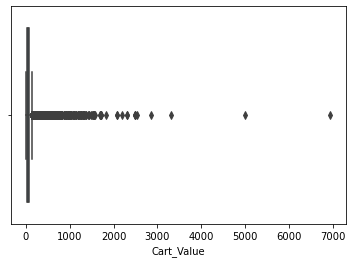

In [55]:
sns.boxplot(df_final.Cart_Value)

<AxesSubplot:xlabel='No_of_time_visited', ylabel='count'>

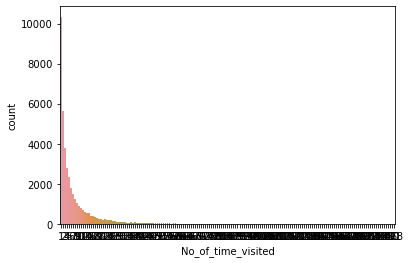

In [56]:
sns.countplot(df_final.No_of_time_visited)

<AxesSubplot:xlabel='Buy_Probability', ylabel='Density'>

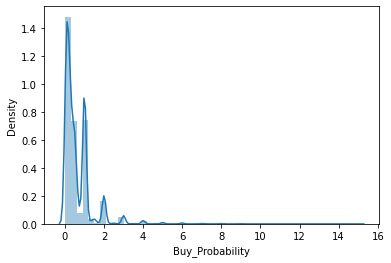

In [57]:
sns.distplot(df_final.Buy_Probability,bins=50)

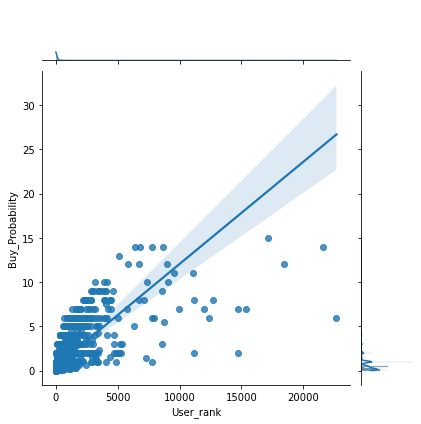

In [58]:
sns.jointplot(x='User_rank',y='Buy_Probability',data=df_final,kind='reg')

<AxesSubplot:xlabel='Buy_Probability', ylabel='Count'>

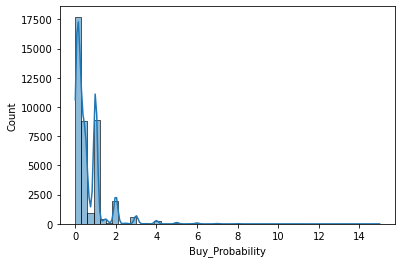

In [59]:
sns.histplot(df_final.Buy_Probability,kde=True,bins=50)

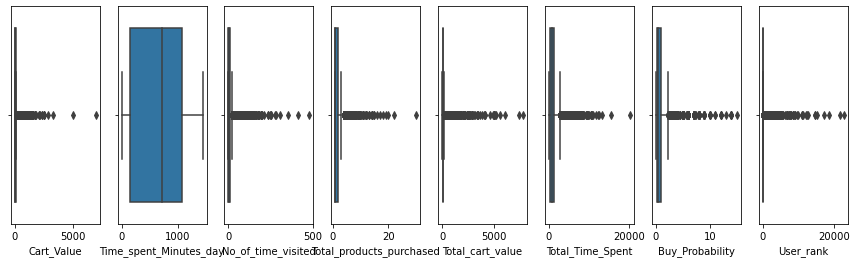

In [60]:
fig, ax = plt.subplots(nrows = 1, ncols = 8, figsize=(15, 4))

for variable, subplot in zip(df_final.columns, ax.flatten()):
    sns.boxplot(df_final[variable], ax = subplot)

plt.show()

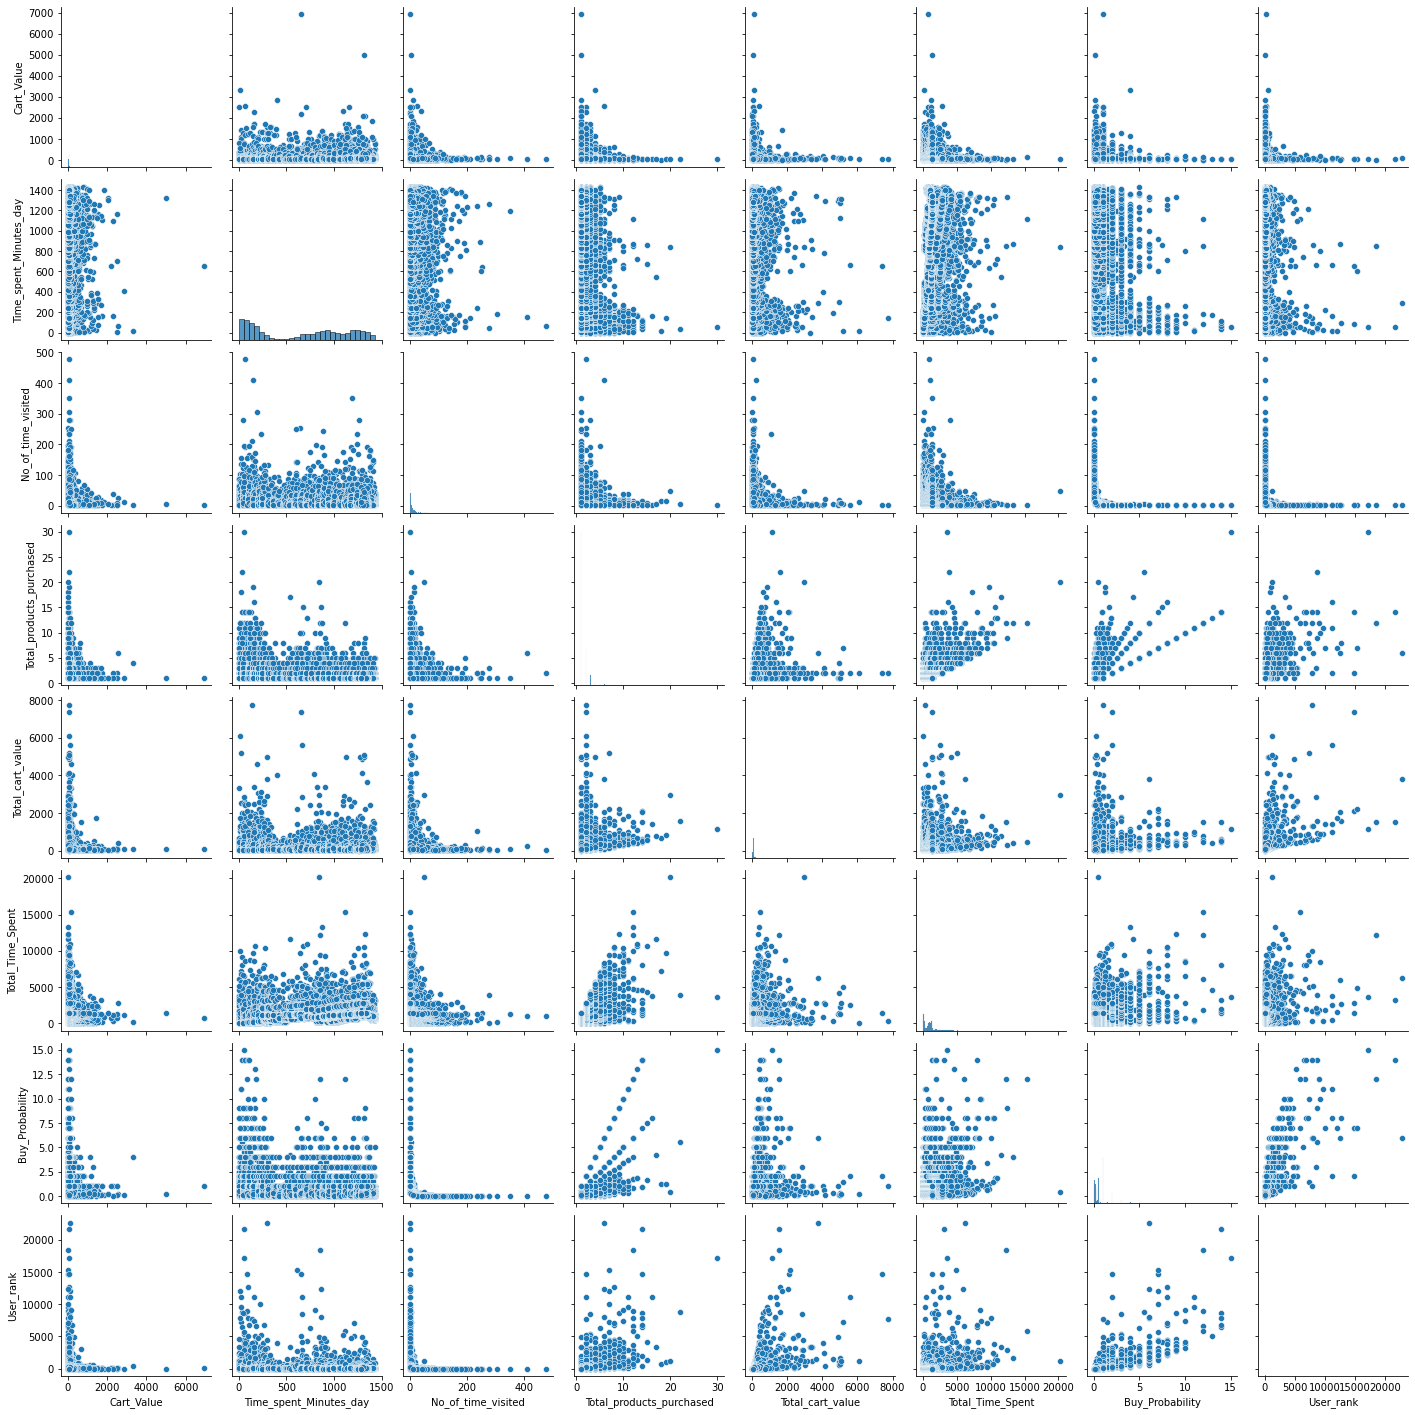

In [61]:
sns.pairplot(df_final)

### Feature Selection

<AxesSubplot:>

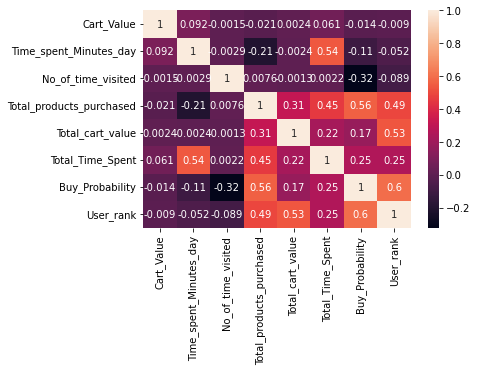

In [62]:
sns.heatmap(df_final.corr(),annot=True)

In [63]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(df_final)

,variables,VIF
0,Cart_Value,1.380
1,Time_spent_Minutes_day,3.446
2,No_of_time_visited,1.517
3,Total_products_purchased,5.163
4,Total_cart_value,1.924
5,Total_Time_Spent,4.821
6,Buy_Probability,3.488
7,User_rank,2.110


### AUTO_EDA

In [ ]:
## distribution of data
!pip install pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df_final, title="Pandas Profiling Report")
profile.to_widgets()
profile.to_file("Web Browsing history.html")

In [ ]:
!pip install dtale
import dtale
d = dtale.show(df_final)
d.open_browser()

In [ ]:
pip install sweetviz
import sweetviz
my_report  = sweetviz.analyze(df_train)
my_report.show_html('FinalReport.html')

In [ ]:
pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz(df_final)
df

In [ ]:
!pip install dataprep
from dataprep.eda import create_report
create_report(df_final)

In [ ]:
!pip install lux
import lux
lux.logger=True
df_final

In [ ]:
!pip install pandas_visual_analysis
from pandas_visual_analysis import VisualAnalysis
VisualAnalysis(df_final)

#### a person visited and  total number product purchased are highly correlated eachother

In [64]:
df_final

,Cart_Value,Time_spent_Minutes_day,No_of_time_visited,Total_products_purchased,Total_cart_value,Total_Time_Spent,Buy_Probability,User_rank
538,44.680,58.924,1,1,157.950,0.450,1.000,157.950
539,44.680,58.935,20,2,60.960,52.050,0.100,6.096
541,27.480,58.929,1,5,216.120,381.190,5.000,1080.600
542,44.680,58.967,1,1,53.240,10.063,1.000,53.240
543,44.680,59.114,2,2,52.480,1424.197,1.000,52.480
...,...,...,...,...,...,...,...,...
78440,35.120,1282.507,4,1,38.680,1375.295,0.250,9.670
78441,79.000,1282.946,1,1,42.720,1393.451,1.000,42.720
78442,89.960,1298.124,1,2,104.280,2791.032,2.000,208.560
78444,69.340,1282.894,88,1,35.480,1373.753,0.011,0.403


### Devide data into dependent and independent

In [65]:
X=df_final.drop('Buy_Probability',axis=1)
X.head()

,Cart_Value,Time_spent_Minutes_day,No_of_time_visited,Total_products_purchased,Total_cart_value,Total_Time_Spent,User_rank
538,44.680,58.924,1,1,157.950,0.450,157.950
539,44.680,58.935,20,2,60.960,52.050,6.096
541,27.480,58.929,1,5,216.120,381.190,1080.600
542,44.680,58.967,1,1,53.240,10.063,53.240
543,44.680,59.114,2,2,52.480,1424.197,52.480


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_features= scaler.transform(X)
X = pd.DataFrame(scaled_features,columns=X.columns)
X.head()

,Cart_Value,Time_spent_Minutes_day,No_of_time_visited,Total_products_purchased,Total_cart_value,Total_Time_Spent,User_rank
0,-0.232,-1.218,-0.515,-0.434,0.312,-1.056,0.174
1,-0.232,-1.218,0.898,0.543,-0.225,-0.997,-0.199
2,-0.391,-1.218,-0.515,3.474,0.634,-0.617,2.439
3,-0.232,-1.218,-0.515,-0.434,-0.268,-1.045,-0.083
4,-0.232,-1.218,-0.441,0.543,-0.272,0.588,-0.085


In [67]:
y=df_final['Buy_Probability']
y.head()

538   1.000
539   0.100
541   5.000
542   1.000
543   1.000
Name: Buy_Probability, dtype: float64

#### Splitting data train test split

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31884, 7) (7972, 7) (31884,) (7972,)


## Model Building
 Each model time of execution for train model 

## Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)

In [71]:
from datetime import datetime
start=datetime.now()
test=lr.fit(X_train,y_train)
end=datetime.now()
train_time_linearRegression=end-start
print(train_time_linearRegression)

0:00:00.315125


In [72]:
y_train_pred=lr.predict(X_train)

In [73]:
y_test_pred=lr.predict(X_test)

In [74]:
df_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
df_train


,Actual,Predicted
54604,0.500,0.491
76886,0.250,0.439
6292,0.222,0.703
28770,1.000,0.615
76507,1.000,0.602
...,...,...
11484,0.400,0.801
24488,1.000,0.618
75154,0.500,0.536
2027,0.500,0.411


In [75]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_test

,Actual,Predicted
4816,0.500,0.815
61536,1.000,0.593
70597,0.500,0.575
38007,0.400,0.797
16419,0.167,0.497
...,...,...
19305,0.500,0.548
56161,0.500,0.807
54650,0.500,0.569
25647,0.500,0.571


In [76]:
print(lr.intercept_)

0.6144465508902007


In [77]:
df_coeff = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
df_coeff

,Coefficient
Cart_Value,0.000
Time_spent_Minutes_day,-0.014
No_of_time_visited,-0.221
Total_products_purchased,0.291
Total_cart_value,-0.163
Total_Time_Spent,0.012
User_rank,0.384


In [78]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [79]:
#trian data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_train,y_train_pred)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1))
print(adjusted_r2)

0.552929965672745
0.552831788666838


In [80]:
evl_metric_lr_train = pd.DataFrame({'Model':'LinearRegression_train','MAE': mean_absolute_error(y_train,y_train_pred),
                                     "MSE":mean_squared_error(y_train,y_train_pred),
                                     'RMSE':np.sqrt(mean_squared_error(y_train,y_train_pred)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                    'Time_execution_trainmodel':train_time_linearRegression
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_lr_train

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,LinearRegression_train,0.365,0.270,0.520,0.553,0.553,0 days 00:00:00.315125


In [81]:
#test data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,y_test_pred)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1))
print(adjusted_r2)

0.597423461783117
0.5970696150016607


In [82]:
evl_metric_lr_test = pd.DataFrame({'Model':'LinearRegression_test','MAE': mean_absolute_error(y_test,y_test_pred),
                                     "MSE":mean_squared_error(y_test,y_test_pred),
                                     'RMSE':np.sqrt(mean_squared_error(y_test,y_test_pred)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,'Time_execution_trainmodel':train_time_linearRegression
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_lr_test

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,LinearRegression_test,0.366,0.275,0.525,0.597,0.597,0 days 00:00:00.315125


In [83]:
evl_metric_linearRegression=pd.concat([evl_metric_lr_train,evl_metric_lr_test],ignore_index=True)
evl_metric_linearRegression

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,LinearRegression_train,0.365,0.270,0.520,0.553,0.553,0 days 00:00:00.315125
1,LinearRegression_test,0.366,0.275,0.525,0.597,0.597,0 days 00:00:00.315125


# Ridge

In [84]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
lambdas=np.linspace(1,100,100)

In [85]:
params={'alpha':lambdas}

In [86]:
model=Ridge(fit_intercept=True)

In [87]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [88]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             scoring='neg_mean_absolute_error')

In [89]:
grid_search.best_estimator_

Ridge()

In [90]:
grid_search.cv_results_

{'mean_fit_time': array([0.04183826, 0.00781212, 0.0140614 , 0.00906842, 0.01465027,
        0.01562433, 0.00937448, 0.01562378, 0.00969577, 0.01289325,
        0.0059366 , 0.01562364, 0.00781226, 0.01562388, 0.00937438,
        0.0155097 , 0.01093657, 0.01406181, 0.01093647, 0.012499  ,
        0.010937  , 0.01524675, 0.01249886, 0.01562426, 0.00781195,
        0.01562393, 0.01249919, 0.01529894, 0.01093693, 0.01699655,
        0.0149684 , 0.00781183, 0.01562405, 0.01251831, 0.01249952,
        0.01562388, 0.00937448, 0.01562407, 0.00624955, 0.01406147,
        0.01057391, 0.01009963, 0.01634896, 0.01562378, 0.00624952,
        0.01649125, 0.00687072, 0.01562407, 0.01093667, 0.01093702,
        0.01562374, 0.00624938, 0.01516349, 0.00624945, 0.01406167,
        0.01093674, 0.01093686, 0.01249914, 0.00903323, 0.01562378,
        0.01609049, 0.01935482, 0.01043212, 0.00937469, 0.00703738,
        0.01406147, 0.01406167, 0.00937428, 0.0156239 , 0.00624967,
        0.0152293 , 0.00624959,

In [91]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [92]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -0.365 (std: 0.006)
Parameters: {'alpha': 1.0}

Model with rank: 2
Mean validation score: -0.365 (std: 0.006)
Parameters: {'alpha': 2.0}

Model with rank: 3
Mean validation score: -0.365 (std: 0.006)
Parameters: {'alpha': 3.0}

Model with rank: 4
Mean validation score: -0.365 (std: 0.006)
Parameters: {'alpha': 4.0}

Model with rank: 5
Mean validation score: -0.365 (std: 0.006)
Parameters: {'alpha': 5.0}



In [93]:
Ridge_model=grid_search.best_estimator_



In [94]:
from datetime import datetime
start=datetime.now()
Ridge_model.fit(X_train,y_train)
end=datetime.now()
train_execute_time=end-start
print(train_execute_time)

0:00:00.015564


In [95]:
list(zip(X_train.columns,Ridge_model.coef_))

[('Cart_Value', 0.0002888142201577848),
 ('Time_spent_Minutes_day', -0.01413488239501749),
 ('No_of_time_visited', -0.22125330686592293),
 ('Total_products_purchased', 0.2908346480668558),
 ('Total_cart_value', -0.16276723997253986),
 ('Total_Time_Spent', 0.012083998232542508),
 ('User_rank', 0.38374417071013145)]

In [96]:
y_test_ridge_pred=Ridge_model.predict(X_test)
y_train_ridge_pred=Ridge_model.predict(X_train)

In [97]:
y_train_pred=Ridge_model.predict(X_train)


In [98]:
#train data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_train,y_train_ridge_pred)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1))
print(adjusted_r2)

0.5529299649617296
0.5528317879556666


In [99]:
evl_metric_lr_Ridge_train = pd.DataFrame({'Model':'LinearRegression_Ridge_train','MAE': mean_absolute_error(y_train,y_train_ridge_pred),
                                     "MSE":mean_squared_error(y_train,y_train_ridge_pred),
                                     'RMSE':np.sqrt(mean_squared_error(y_train,y_train_ridge_pred)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                    'Time_execution_trainmodel':train_execute_time  
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2', 'Time_execution_trainmodel'],index=[0])

evl_metric_lr_Ridge_train

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,LinearRegression_Ridge_train,0.365,0.270,0.520,0.553,0.553,0 days 00:00:00.015564


In [100]:
#test data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,y_test_ridge_pred)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1))
print(adjusted_r2)

0.5974217767713959
0.5970679285088896


In [101]:
evl_metric_lr_Ridge_test= pd.DataFrame({'Model':'LinearRegression_Ridge_test','MAE': mean_absolute_error(y_test,y_test_ridge_pred),
                                     "MSE":mean_squared_error(y_test,y_test_ridge_pred),
                                     'RMSE':np.sqrt(mean_squared_error(y_test,y_test_ridge_pred)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                    'Time_execution_trainmodel':train_execute_time  
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2', 'Time_execution_trainmodel'],index=[0])

evl_metric_lr_Ridge_test

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,LinearRegression_Ridge_test,0.366,0.275,0.525,0.597,0.597,0 days 00:00:00.015564


In [102]:
df_eval_ridge=pd.concat([evl_metric_lr_Ridge_train,evl_metric_lr_Ridge_test],axis=0)
df_eval_ridge

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,LinearRegression_Ridge_train,0.365,0.270,0.520,0.553,0.553,0 days 00:00:00.015564
0,LinearRegression_Ridge_test,0.366,0.275,0.525,0.597,0.597,0 days 00:00:00.015564


# lasso

In [319]:
lambdas=np.linspace(1,10,100)
model=Lasso(fit_intercept=True)
params={'alpha':lambdas}

In [320]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [321]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3....
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27272727,
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ])},
       

In [322]:
lasso_model=grid_search.best_estimator_


In [323]:
from datetime import datetime
start=datetime.now()
lasso_model.fit(X_train,y_train)
end=datetime.now()
train_execute_time=end-start
print(train_execute_time)

0:00:00.013992


In [324]:

list(zip(X_train.columns,lasso_model.coef_))

[('Cart_Value', -0.0),
 ('Time_spent_Minutes_day', -0.0),
 ('No_of_time_visited', -0.0),
 ('Total_products_purchased', 0.0),
 ('Total_cart_value', 0.0),
 ('Total_Time_Spent', 0.0),
 ('User_rank', 0.0)]

 as all coefficeient zero we will not get feature Importance

In [325]:
y_test_lasso_pred=lasso_model.predict(X_test)
y_train_lasso_pred=lasso_model.predict(X_train)

In [326]:
#train data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_train,y_train_lasso_pred)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1))
print(adjusted_r2)

0.0
-0.00021960095369566446


In [327]:
evl_metric_lr_lasso_train = pd.DataFrame({'Model':'LinearRegression_lasso_train','MAE': mean_absolute_error(y_train,y_train_lasso_pred),
                                     "MSE":mean_squared_error(y_train,y_train_lasso_pred),
                                     'RMSE':np.sqrt(mean_squared_error(y_train,y_train_lasso_pred)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                    'Time_execution_trainmodel':train_execute_time
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_lr_lasso_train

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,LinearRegression_lasso_train,0.507,0.604,0.777,0.000,-0.000,0 days 00:00:00.013992


In [328]:
#test data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,y_test_lasso_pred)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1))
print(adjusted_r2)

-0.0001176063491836743
-0.0009966650187522852


In [329]:
evl_metric_lr_lasso_test = pd.DataFrame({'Model':'LinearRegression_lasso_train','MAE': mean_absolute_error(y_test,y_test_lasso_pred),
                                     "MSE":mean_squared_error(y_test,y_test_lasso_pred),
                                     'RMSE':np.sqrt(mean_squared_error(y_test,y_test_lasso_pred)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                    'Time_execution_trainmodel':train_execute_time
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_lr_lasso_test

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,LinearRegression_lasso_train,0.514,0.684,0.827,-0.000,-0.001,0 days 00:00:00.013992


In [330]:
df_eval_lasso=pd.concat([evl_metric_lr_lasso_train,evl_metric_lr_lasso_test],axis=0)
df_eval_lasso

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,LinearRegression_lasso_train,0.507,0.604,0.777,0.000,-0.000,0 days 00:00:00.013992
0,LinearRegression_lasso_train,0.514,0.684,0.827,-0.000,-0.001,0 days 00:00:00.013992


## BayesianRidge

In [266]:
from sklearn.linear_model import BayesianRidge
bayes=BayesianRidge()

In [275]:
bay_params = {'alpha_init':[1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9],
              'lambda_init': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9]}
grid_bayes= GridSearchCV(bayes, param_grid = bay_params, cv = 3, n_jobs=-1)
grid_bayes.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=BayesianRidge(), n_jobs=-1,
             param_grid={'alpha_init': [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9],
                         'lambda_init': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                         1e-09]})

In [277]:
model_bayes=grid_bayes.best_estimator_

In [278]:
from datetime import datetime
start=datetime.now()
model_bayes.fit(X_train,y_train)
end=datetime.now()
train_execute_time=end-start
print(train_execute_time)

0:00:00.685614


In [279]:
pred_train = model_bayes.predict(X_train)
prediction_bayes_train = pd.DataFrame({"Predicted":pred_train,"Actual":y_train},columns = ['Predicted','Actual'])
prediction_bayes_train

,Predicted,Actual
54604,0.491,0.500
76886,0.439,0.250
6292,0.703,0.222
28770,0.615,1.000
76507,0.602,1.000
...,...,...
11484,0.801,0.400
24488,0.618,1.000
75154,0.536,0.500
2027,0.411,0.500


In [280]:
pred_test = model_bayes.predict(X_test)
prediction_bayes_test = pd.DataFrame({"Predicted":pred_test,"Actual":y_test},columns = ['Predicted','Actual'])
prediction_bayes_test

,Predicted,Actual
4816,0.815,0.500
61536,0.593,1.000
70597,0.575,0.500
38007,0.797,0.400
16419,0.497,0.167
...,...,...
19305,0.548,0.500
56161,0.807,0.500
54650,0.569,0.500
25647,0.571,0.500


In [281]:
#trian data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_train,pred_train)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1))
print(adjusted_r2)

0.5529299388432902
0.5528317618314915


In [282]:
evl_metric_bayes_train = pd.DataFrame({'Model':'Bayes_train','MAE': mean_absolute_error(y_train,pred_train),
                                     "MSE":mean_squared_error(y_train,pred_train),
                                     'RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                    'Time_execution_trainmodel':train_execute_time 
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_bayes_train

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,Bayes_train,0.365,0.270,0.520,0.553,0.553,0 days 00:00:00.685614


In [283]:
#test data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,pred_test)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1))
print(adjusted_r2)

0.5974130899193492
0.5970592340214882


In [284]:
evl_metric_bayes_test = pd.DataFrame({'Model':'Bayes_test','MAE': mean_absolute_error(y_test,pred_test),
                                     "MSE":mean_squared_error(y_test,pred_test),
                                     'RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                     'Time_execution_trainmodel':train_execute_time
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_bayes_test

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,Bayes_test,0.366,0.275,0.525,0.597,0.597,0 days 00:00:00.685614


In [285]:
evl_metric_bayes=pd.concat([evl_metric_bayes_train,evl_metric_bayes_test],ignore_index=True)
evl_metric_bayes

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,Bayes_train,0.365,0.270,0.520,0.553,0.553,0 days 00:00:00.685614
1,Bayes_test,0.366,0.275,0.525,0.597,0.597,0 days 00:00:00.685614


## KNN- Regression

In [115]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [116]:
error_rate= []

for i in range(1,60):
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

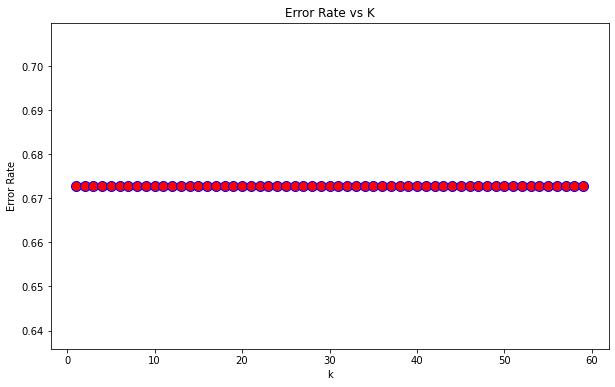

In [117]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',linestyle='--',
         marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('k')
plt.ylabel('Error Rate')

In [118]:
param={'n_neighbors':np.arange(1,20)}
knn_cv=GridSearchCV(knn,param,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [119]:
print(knn_cv.best_score_,knn_cv.best_params_,sep='\n')

0.9567904214026022
{'n_neighbors': 3}


In [120]:
model=KNeighborsRegressor(n_neighbors=3)


In [121]:
from datetime import datetime
start=datetime.now()
model.fit(X_train,y_train)
end=datetime.now()
train_execute_time=end-start
print(train_execute_time)

0:00:00.182925


In [122]:
pred_test=model.predict(X_test)
pred_train=model.predict(X_train)

In [123]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': pred_test})
df_test

,Actual,Predicted
4816,0.500,0.611
61536,1.000,1.000
70597,0.500,0.500
38007,0.400,0.651
16419,0.167,0.167
...,...,...
19305,0.500,0.500
56161,0.500,0.467
54650,0.500,0.500
25647,0.500,0.833


In [124]:
df_train = pd.DataFrame({'Actual': y_train, 'Predicted': pred_train})
df_train

,Actual,Predicted
54604,0.500,0.500
76886,0.250,0.233
6292,0.222,0.222
28770,1.000,1.000
76507,1.000,1.000
...,...,...
11484,0.400,0.400
24488,1.000,1.000
75154,0.500,0.444
2027,0.500,0.444


## Model Validation

In [125]:
#trian data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_train,pred_train)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1))
print(adjusted_r2)

0.9810156163090581
0.9810114473202942


In [126]:
len(y_train)

31884

In [127]:
X_train.shape[1]

7

In [128]:
1-r2_score1

0.01898438369094191

In [129]:
((1-r2_score1)*(len(y_train)-1))

605.2791052183009

In [130]:
(len(y_train)-X_train.shape[1]-1)

31876

In [131]:
from sklearn.metrics import r2_score
adjusted_r2=1 - (((1-r2_score1)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1))
adjusted_r2

0.9810114473202942

In [132]:
from sklearn.metrics import r2_score
evl_metric_knn_train = pd.DataFrame({'Model':'KNN_train','MAE': mean_absolute_error(y_train,pred_train),
                                     "MSE":mean_squared_error(y_train,pred_train),
                                     'RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                    'Time_execution_trainmodel':train_execute_time 
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_knn_train

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,KNN_train,0.028,0.011,0.107,0.981,0.981,0 days 00:00:00.182925


In [133]:
#test data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,pred_test)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1))
print(adjusted_r2)

0.958909375200601
0.9588732583782008


In [134]:
evl_metric_knn_test = pd.DataFrame({'Model':'KNN_test','MAE': mean_absolute_error(y_test,pred_test),
                                     "MSE":mean_squared_error(y_test,pred_test),
                                     'RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                     'Time_execution_trainmodel':train_execute_time
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_knn_test

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,KNN_test,0.046,0.028,0.168,0.959,0.959,0 days 00:00:00.182925


In [135]:
evl_metric_knn=pd.concat([evl_metric_knn_train,evl_metric_knn_test],ignore_index=True)
evl_metric_knn

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,KNN_train,0.028,0.011,0.107,0.981,0.981,0 days 00:00:00.182925
1,KNN_test,0.046,0.028,0.168,0.959,0.959,0 days 00:00:00.182925


## Support Vector Machine

In [254]:
from sklearn.svm import SVR
svr = SVR()


In [255]:
#param={'kernel':['rbf'],
#    'degree':[3],
 #   'gamma':['scale'],
  #  'C':[1],
   # 'epsilon':[0.1]}
#gridseach= GridSearchCV(svr,param_grid=param,cv=5)
#gridseach.fit(X_train,y_train) 
#model_svr=gridseach.best_estimator_

In [256]:
from datetime import datetime
start=datetime.now()
svr.fit(X_train,y_train)
end=datetime.now()
train_execute_time=end-start
print(train_execute_time)

0:01:04.280279


In [257]:
pred_train =svr.predict(X_train)
prediction_svr_train = pd.DataFrame({"Predicted":pred_train,"Actual":y_train},columns = ['Predicted','Actual'])
prediction_svr_train

,Predicted,Actual
54604,0.457,0.500
76886,0.178,0.250
6292,0.134,0.222
28770,0.899,1.000
76507,0.999,1.000
...,...,...
11484,0.452,0.400
24488,0.933,1.000
75154,0.556,0.500
2027,0.476,0.500


In [258]:
pred_test = svr.predict(X_test)
prediction_svr_test = pd.DataFrame({"Predicted":pred_test,"Actual":y_test},columns = ['Predicted','Actual'])
prediction_svr_test

,Predicted,Actual
4816,0.543,0.500
61536,1.025,1.000
70597,0.605,0.500
38007,0.412,0.400
16419,0.151,0.167
...,...,...
19305,0.548,0.500
56161,0.547,0.500
54650,0.599,0.500
25647,0.588,0.500


In [259]:
#trian data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_train,pred_train)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1))
print(adjusted_r2)

0.9141428909620057
0.9141240366589795


In [260]:
evl_metric_svm_train = pd.DataFrame({'Model':' SVM_train','MAE': mean_absolute_error(y_train,pred_train),
                                     "MSE":mean_squared_error(y_train,pred_train),
                                     'RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                    'Time_execution_trainmodel':train_execute_time 
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_svm_train

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,SVM_train,0.081,0.052,0.228,0.914,0.914,0 days 00:01:04.280279


In [261]:
#test data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,pred_test)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1))
print(adjusted_r2)

0.8456062296561933
0.8454705244336409


In [262]:
evl_metric_svm_test = pd.DataFrame({'Model':'SVM_test','MAE': mean_absolute_error(y_test,pred_test),
                                     "MSE":mean_squared_error(y_test,pred_test),
                                     'RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                     'Time_execution_trainmodel':train_execute_time
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_svm_test

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,SVM_test,0.090,0.106,0.325,0.846,0.845,0 days 00:01:04.280279


In [264]:
evl_metric_svm=pd.concat([evl_metric_svm_train,evl_metric_svm_test],ignore_index=True)
evl_metric_svm

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,SVM_train,0.081,0.052,0.228,0.914,0.914,0 days 00:01:04.280279
1,SVM_test,0.090,0.106,0.325,0.846,0.845,0 days 00:01:04.280279


## Decision Tree

In [159]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [164]:
param={"splitter":["best","random"],
            "max_depth" : [3,5],
           "min_samples_leaf":[2,3],
           "min_weight_fraction_leaf":[0.1,0.2],
           "max_features":["auto","log2","sqrt"],
           "max_leaf_nodes":[10,20] }

In [165]:
gridseach_cv_DT = GridSearchCV(regressor,param_grid=param,cv=5)
gridseach_cv_DT.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [10, 20], 'min_samples_leaf': [2, 3],
                         'min_weight_fraction_leaf': [0.1, 0.2],
                         'splitter': ['best', 'random']})

In [166]:
dt_model=gridseach_cv_DT.best_estimator_

In [167]:
from datetime import datetime
start=datetime.now()
dt_model.fit(X_train,y_train)
end=datetime.now()
train_execute_time=end-start
print(train_execute_time)

0:00:00.137922


In [173]:
pred_train = dt_model.predict(X_train)
prediction_dt_train = pd.DataFrame({"Predicted":pred_train,"Actual":y_train},columns = ['Predicted','Actual'])
prediction_dt_train

,Predicted,Actual
54604,0.565,0.500
76886,0.314,0.250
6292,0.314,0.222
28770,1.030,1.000
76507,1.030,1.000
...,...,...
11484,0.314,0.400
24488,1.030,1.000
75154,0.565,0.500
2027,1.886,0.500


In [172]:
pred_test = dt_model.predict(X_test)
prediction_dt_test = pd.DataFrame({"Predicted":pred_test,"Actual":y_test},columns = ['Predicted','Actual'])
prediction_dt_test

,Predicted,Actual
4816,0.314,0.500
61536,1.030,1.000
70597,0.448,0.500
38007,0.314,0.400
16419,0.190,0.167
...,...,...
19305,0.565,0.500
56161,0.314,0.500
54650,0.448,0.500
25647,0.565,0.500


In [174]:
#trian data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_train,pred_train)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1))
print(adjusted_r2)

0.5813509838164032
0.5812590480931855


In [175]:
evl_metric_dt_train = pd.DataFrame({'Model':' DecisionTree_train','MAE': mean_absolute_error(y_train,pred_train),
                                     "MSE":mean_squared_error(y_train,pred_train),
                                     'RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                    'Time_execution_trainmodel':train_execute_time 
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_dt_train

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,DecisionTree_train,0.181,0.253,0.503,0.581,0.581,0 days 00:00:00.137922


In [176]:
#test data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,pred_test)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1))
print(adjusted_r2)

0.5407486501921074
0.5403449887846921


In [178]:
evl_metric_dt_test = pd.DataFrame({'Model':'DecisionTree_train','MAE': mean_absolute_error(y_test,pred_test),
                                     "MSE":mean_squared_error(y_test,pred_test),
                                     'RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                     'Time_execution_trainmodel':train_execute_time
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_dt_test

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,DecisionTree_train,0.192,0.314,0.561,0.541,0.540,0 days 00:00:00.137922


In [179]:
evl_metric_dt=pd.concat([evl_metric_dt_train,evl_metric_dt_test],ignore_index=True)
evl_metric_dt

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,DecisionTree_train,0.181,0.253,0.503,0.581,0.581,0 days 00:00:00.137922
1,DecisionTree_train,0.192,0.314,0.561,0.541,0.540,0 days 00:00:00.137922


# Random Forest Model

In [136]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [137]:
from sklearn.metrics import mean_squared_error,r2_score

## predicting on train data
pred_train = rf.predict(X_train)

prediction_rf = pd.DataFrame({"Predicted":pred_train,"Actual":y_train},columns = ['Predicted','Actual'])

In [138]:
prediction_rf

,Predicted,Actual
54604,0.499,0.500
76886,0.250,0.250
6292,0.222,0.222
28770,1.000,1.000
76507,1.000,1.000
...,...,...
11484,0.400,0.400
24488,1.000,1.000
75154,0.500,0.500
2027,0.501,0.500


In [139]:
pred_test = rf.predict(X_test)

prediction_rf_test = pd.DataFrame({"Predicted":pred_test,"Actual":y_test},columns = ['Predicted','Actual'])

In [140]:
prediction_rf_test

,Predicted,Actual
4816,0.500,0.500
61536,1.000,1.000
70597,0.500,0.500
38007,0.400,0.400
16419,0.167,0.167
...,...,...
19305,0.500,0.500
56161,0.500,0.500
54650,0.500,0.500
25647,0.500,0.500


In [141]:
evl_metric_rf_train = pd.DataFrame({'Model':'RandomForest_train','RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                    "MAE":mean_squared_error(y_train,pred_train),
                                   "R2_score":r2_score(y_train,pred_train)},columns=['Model','RMSE','MAE','R2_score'],index=[0])

In [142]:
evl_metric_rf_test = pd.DataFrame({'Model':'RandomForest_test','RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                    "MAE":mean_squared_error(y_test,pred_test),
                                   "R2_score":r2_score(y_test,pred_test)},columns=['Model','RMSE','MAE','R2_score'],index=[0])


In [143]:
rf_model_metric_no_tuning = pd.concat([evl_metric_rf_train,evl_metric_rf_test],ignore_index=True)

In [144]:
rf_model_metric_no_tuning

,Model,RMSE,MAE,R2_score
0,RandomForest_train,0.021,0.000,0.999
1,RandomForest_test,0.044,0.002,0.997


#### The model is completely overfitting, 

In [146]:
from sklearn.model_selection import GridSearchCV

n_estimators = [200]
max_features = ['auto']
max_depth = [10,12]
min_samples_split =[12,15]
min_samples_leaf = [2]
bootstrap = [True]

param = {'n_estimators':n_estimators,
        'max_features':max_features,
        'max_depth':max_depth,
        'min_samples_split':min_samples_split,
        'min_samples_leaf':min_samples_leaf,
        'bootstrap':bootstrap}

gridseach_cv_rf = GridSearchCV(rf,param_grid=param,cv=5,verbose=3)
gridseach_cv_rf.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=200;, score=0.997 total time=  25.8s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=200;, score=0.978 total time=  25.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=200;, score=0.998 total time=  25.5s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=200;, score=0.998 total time=  25.2s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=12, n_estimators=200;, score=0.998 total time=  25.3s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200;, score=0.995 total time=  25.3s
[CV 2/5] END boo

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [10, 12],
                         'max_features': ['auto'], 'min_samples_leaf': [2],
                         'min_samples_split': [12, 15], 'n_estimators': [200]},
             verbose=3)

In [149]:
rf_model=gridseach_cv_rf.best_estimator_

In [150]:
from datetime import datetime
start=datetime.now()
rf_model.fit(X_train,y_train)
end=datetime.now()
train_execute_time=end-start
print(train_execute_time)

0:00:30.854813


In [152]:
pred_train = rf_model.predict(X_train)
prediction_rf = pd.DataFrame({"Predicted":pred_train,"Actual":y_train},columns = ['Predicted','Actual'])
prediction_rf

,Predicted,Actual
54604,0.501,0.500
76886,0.250,0.250
6292,0.222,0.222
28770,1.000,1.000
76507,1.000,1.000
...,...,...
11484,0.400,0.400
24488,1.000,1.000
75154,0.500,0.500
2027,0.501,0.500


In [153]:
pred_test = rf_model.predict(X_test)
prediction_rf_test = pd.DataFrame({"Predicted":pred_test,"Actual":y_test},columns = ['Predicted','Actual'])
prediction_rf_test

,Predicted,Actual
4816,0.500,0.500
61536,1.000,1.000
70597,0.500,0.500
38007,0.400,0.400
16419,0.167,0.167
...,...,...
19305,0.500,0.500
56161,0.500,0.500
54650,0.500,0.500
25647,0.500,0.500


In [154]:
#trian data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_train,pred_train)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1))
print(adjusted_r2)

0.9971746042351002
0.9971739837754956


In [155]:
from sklearn.metrics import r2_score
evl_metric_rf_train = pd.DataFrame({'Model':'RandomForest_train','MAE': mean_absolute_error(y_train,pred_train),
                                     "MSE":mean_squared_error(y_train,pred_train),
                                     'RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                    'Time_execution_trainmodel':train_execute_time 
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_rf_train

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,RandomForest_train,0.002,0.002,0.041,0.997,0.997,0 days 00:00:30.854813


In [156]:
#test data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,pred_test)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1))
print(adjusted_r2)

0.9969427641725829
0.9969400769989526


In [157]:
evl_metric_rf_test = pd.DataFrame({'Model':'RandomForest_test','MAE': mean_absolute_error(y_test,pred_test),
                                     "MSE":mean_squared_error(y_test,pred_test),
                                     'RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                     'Time_execution_trainmodel':train_execute_time
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_rf_test

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,RandomForest_test,0.003,0.002,0.046,0.997,0.997,0 days 00:00:30.854813


In [158]:
evl_metric_rf=pd.concat([evl_metric_rf_train,evl_metric_rf_test],ignore_index=True)
evl_metric_rf

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,RandomForest_train,0.002,0.002,0.041,0.997,0.997,0 days 00:00:30.854813
1,RandomForest_test,0.003,0.002,0.046,0.997,0.997,0 days 00:00:30.854813


### Feature importance 

In [214]:
df_final.columns

Index(['Cart_Value', 'Time_spent_Minutes_day', 'No_of_time_visited',
       'Total_products_purchased', 'Total_cart_value', 'Total_Time_Spent',
       'Buy_Probability', 'User_rank'],
      dtype='object')

<AxesSubplot:title={'center':'Feature Importance'}>

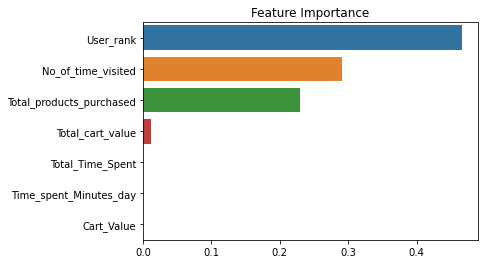

In [215]:
Feature_importance = pd.Series(data = rf_model.feature_importances_, 
                               index=['Cart_Value', 
                                      'Time_spent_Minutes_day',
                                      'No_of_time_visited',
                                      'Total_products_purchased', 
                                      'Total_cart_value', 
                                      'Total_Time_Spent',
                                      'User_rank']).sort_values(ascending=False)
plt.title("Feature Importance")
sns.barplot(y=Feature_importance.index,x=Feature_importance.values,orient ='h')

# BOOSTING

## AdaBoosting

In [180]:
from sklearn.ensemble import AdaBoostRegressor
adaboost=AdaBoostRegressor()

In [188]:
param={'n_estimators':[500],
       'learning_rate':[0.01],
       'random_state':[1]}
grid_search=GridSearchCV(adaboost,param_grid=param,scoring='neg_mean_squared_error',n_jobs=1,cv=5)

In [189]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.01], 'n_estimators': [500],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [190]:
ada_model=grid_search.best_estimator_

In [191]:
from datetime import datetime
start=datetime.now()
ada_model.fit(X_train,y_train)
end=datetime.now()
train_execute_time=end-start
print(train_execute_time)

0:01:11.505150


In [192]:
pred_train = ada_model.predict(X_train)
prediction_ada_train = pd.DataFrame({"Predicted":pred_train,"Actual":y_train},columns = ['Predicted','Actual'])
prediction_ada_train

,Predicted,Actual
54604,0.778,0.500
76886,0.233,0.250
6292,0.227,0.222
28770,1.000,1.000
76507,1.000,1.000
...,...,...
11484,0.229,0.400
24488,1.000,1.000
75154,0.546,0.500
2027,1.086,0.500


In [193]:
pred_test = ada_model.predict(X_test)
prediction_rf_test = pd.DataFrame({"Predicted":pred_test,"Actual":y_test},columns = ['Predicted','Actual'])
prediction_rf_test

,Predicted,Actual
4816,0.233,0.500
61536,1.000,1.000
70597,0.389,0.500
38007,0.230,0.400
16419,0.228,0.167
...,...,...
19305,0.546,0.500
56161,0.235,0.500
54650,0.389,0.500
25647,0.389,0.500


In [194]:
#train data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_train,pred_train)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1))
print(adjusted_r2)

0.9070019543793103
0.9069815319198001


In [195]:
evl_metric_ada_train = pd.DataFrame({'Model':'Adaboosting_train','MAE': mean_absolute_error(y_train,pred_train),
                                     "MSE":mean_squared_error(y_train,pred_train),
                                     'RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                    'Time_execution_trainmodel':train_execute_time 
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_ada_train

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,Adaboosting_train,0.136,0.056,0.237,0.907,0.907,0 days 00:01:11.505150


In [196]:
#test data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,pred_test)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1))
print(adjusted_r2)

0.9033992841481708
0.9033143764371007


In [197]:
evl_metric_ada_test = pd.DataFrame({'Model':'Adaboosting_test','MAE': mean_absolute_error(y_test,pred_test),
                                     "MSE":mean_squared_error(y_test,pred_test),
                                     'RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                     'Time_execution_trainmodel':train_execute_time
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_ada_test

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,Adaboosting_test,0.140,0.066,0.257,0.903,0.903,0 days 00:01:11.505150


In [198]:
evl_metric_ada=pd.concat([evl_metric_ada_train,evl_metric_ada_test],ignore_index=True)
evl_metric_ada

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,Adaboosting_train,0.136,0.056,0.237,0.907,0.907,0 days 00:01:11.505150
1,Adaboosting_test,0.140,0.066,0.257,0.903,0.903,0 days 00:01:11.505150


## GBM

In [199]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor()

In [201]:
param={'n_estimators':[500],
       'learning_rate':[0.01],
       'random_state':[1],
      'loss':['squared_error', 'absolute_error']}
grid_search=GridSearchCV(gbm,param_grid=param,scoring='neg_mean_squared_error',n_jobs=1,cv=5)

In [202]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.01],
                         'loss': ['squared_error', 'absolute_error'],
                         'n_estimators': [500], 'random_state': [1]},
             scoring='neg_mean_squared_error')

In [203]:
gbm_model=grid_search.best_estimator_

In [204]:
from datetime import datetime
start=datetime.now()
gbm_model.fit(X_train,y_train)
end=datetime.now()
train_execute_time=end-start
print(train_execute_time)

0:00:59.175681


In [205]:
pred_train = gbm_model.predict(X_train)
prediction_gbm_train = pd.DataFrame({"Predicted":pred_train,"Actual":y_train},columns = ['Predicted','Actual'])
prediction_gbm_train

,Predicted,Actual
54604,0.554,0.500
76886,0.272,0.250
6292,0.211,0.222
28770,0.987,1.000
76507,0.987,1.000
...,...,...
11484,0.348,0.400
24488,0.987,1.000
75154,0.564,0.500
2027,0.593,0.500


In [206]:
pred_test = gbm_model.predict(X_test)
prediction_gbm_test = pd.DataFrame({"Predicted":pred_test,"Actual":y_test},columns = ['Predicted','Actual'])
prediction_gbm_test

,Predicted,Actual
4816,0.460,0.500
61536,0.987,1.000
70597,0.496,0.500
38007,0.361,0.400
16419,0.173,0.167
...,...,...
19305,0.563,0.500
56161,0.490,0.500
54650,0.502,0.500
25647,0.503,0.500


In [207]:
#train data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_train,pred_train)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1))
print(adjusted_r2)

0.996220250094613
0.9962194200579291


In [208]:
evl_metric_gbm_train = pd.DataFrame({'Model':'GBM_train','MAE': mean_absolute_error(y_train,pred_train),
                                     "MSE":mean_squared_error(y_train,pred_train),
                                     'RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                    'Time_execution_trainmodel':train_execute_time 
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_gbm_train

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,GBM_train,0.024,0.002,0.048,0.996,0.996,0 days 00:00:59.175681


In [209]:
#test data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,pred_test)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1))
print(adjusted_r2)

0.9939384537506922
0.9939331259224972


In [210]:
evl_metric_gbm_test = pd.DataFrame({'Model':'GBM_test','MAE': mean_absolute_error(y_test,pred_test),
                                     "MSE":mean_squared_error(y_test,pred_test),
                                     'RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                     'Time_execution_trainmodel':train_execute_time
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_gbm_test

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,GBM_test,0.025,0.004,0.064,0.994,0.994,0 days 00:00:59.175681


In [211]:
evl_metric_gbm=pd.concat([evl_metric_gbm_train,evl_metric_gbm_test],ignore_index=True)
evl_metric_gbm

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,GBM_train,0.024,0.002,0.048,0.996,0.996,0 days 00:00:59.175681
1,GBM_test,0.025,0.004,0.064,0.994,0.994,0 days 00:00:59.175681


## XGboost

In [218]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror')

In [222]:
param_grid={
   
    'learning_rate':[0.1,0.2],
    'max_depth': [5,10],
    'n_estimators':[50,100],
    'reg_alpha':[0.50,0.75],
    'reg_lambda':[0.25,0.35],
    'subsample':[0.3,0.6]    
}

In [223]:
grid_xgb = GridSearchCV(xgb,param_grid =param_grid ,cv=3, verbose=3)
grid_xgb.fit(X_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.986 total time=   1.3s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.997 total time=   1.1s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.996 total time=   1.1s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.986 total time=   1.5s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.996 total time=   1.5s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.997 total time=   1.7s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35

[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.998 total time=   2.5s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.998 total time=   2.7s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.986 total time=   2.0s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.995 total time=   2.0s
[CV 3/3] END learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.996 total time=   1.9s
[CV 1/3] END learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.986 total time=   2.4s
[CV 2/3] END learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.997 total time=   2.5s
[

[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.996 total time=   1.1s
[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.988 total time=   1.4s
[CV 2/3] END learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.996 total time=   1.4s
[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.997 total time=   1.4s
[CV 1/3] END learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.989 total time=   2.1s
[CV 2/3] END learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.996 total time=   2.2s
[CV 3/3] END learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.997 total time=   2.1s
[CV 1/

[CV 1/3] END learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.988 total time=   5.4s
[CV 2/3] END learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.993 total time=   5.3s
[CV 3/3] END learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.996 total time=   5.6s
[CV 1/3] END learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.989 total time=   6.2s
[CV 2/3] END learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.996 total time=   5.1s
[CV 3/3] END learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.998 total time=   4.8s
[CV 1/3] END learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.989 total time=   3.6

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                           

In [224]:
xgb_model=grid_search.best_estimator_

In [225]:
from datetime import datetime
start=datetime.now()
xgb_model.fit(X_train,y_train)
end=datetime.now()
train_execute_time=end-start
print(train_execute_time)

0:00:55.174482


In [226]:
pred_train = xgb_model.predict(X_train)
prediction_xgb_train = pd.DataFrame({"Predicted":pred_train,"Actual":y_train},columns = ['Predicted','Actual'])
prediction_xgb_train

,Predicted,Actual
54604,0.554,0.500
76886,0.272,0.250
6292,0.211,0.222
28770,0.987,1.000
76507,0.987,1.000
...,...,...
11484,0.348,0.400
24488,0.987,1.000
75154,0.564,0.500
2027,0.593,0.500


In [227]:
pred_test = xgb_model.predict(X_test)
prediction_xgb_test = pd.DataFrame({"Predicted":pred_test,"Actual":y_test},columns = ['Predicted','Actual'])
prediction_xgb_test

,Predicted,Actual
4816,0.460,0.500
61536,0.987,1.000
70597,0.496,0.500
38007,0.361,0.400
16419,0.173,0.167
...,...,...
19305,0.563,0.500
56161,0.490,0.500
54650,0.502,0.500
25647,0.503,0.500


In [228]:
#train data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_train,pred_train)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1))
print(adjusted_r2)

0.996220250094613
0.9962194200579291


In [229]:
evl_metric_xgb_train = pd.DataFrame({'Model':'XGB_train','MAE': mean_absolute_error(y_train,pred_train),
                                     "MSE":mean_squared_error(y_train,pred_train),
                                     'RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                    'Time_execution_trainmodel':train_execute_time 
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_xgb_train

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,XGB_train,0.024,0.002,0.048,0.996,0.996,0 days 00:00:55.174482


In [230]:
#test data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,pred_test)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1))
print(adjusted_r2)

0.9939384537506922
0.9939331259224972


In [232]:
evl_metric_xgb_test = pd.DataFrame({'Model':'XGB_test','MAE': mean_absolute_error(y_test,pred_test),
                                     "MSE":mean_squared_error(y_test,pred_test),
                                     'RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                     'Time_execution_trainmodel':train_execute_time
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_xgb_test

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,XGB_test,0.025,0.004,0.064,0.994,0.994,0 days 00:00:55.174482


In [233]:
evl_metric_xgb=pd.concat([evl_metric_xgb_train,evl_metric_xgb_test],ignore_index=True)
evl_metric_xgb

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,XGB_train,0.024,0.002,0.048,0.996,0.996,0 days 00:00:55.174482
1,XGB_test,0.025,0.004,0.064,0.994,0.994,0 days 00:00:55.174482


## Light GBM

In [234]:
!pip install lightgbm

  Using cached lightgbm-3.3.2-py3-none-win_amd64.whl (1.0 MB)


In [235]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()

In [236]:
param_grid={
    'boosting_type':['gbdt','dart'],
    'learning_rate':[0.1,0.2],
    'max_depth': [5,10],
    'n_estimators':[50,100],
    'reg_alpha':[0.50,0.75],
    'reg_lambda':[0.25,0.35],
    'subsample':[0.3,0.6]    
}

In [237]:
grid_lgbm = GridSearchCV(lgbm,param_grid =param_grid ,cv=3, verbose=3)
grid_lgbm.fit(X_train,y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits
[CV 1/3] END boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.975 total time=   0.4s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.995 total time=   0.2s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.994 total time=   0.4s
[CV 1/3] END boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.975 total time=   0.1s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.995 total time=   0.1s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, sc

[CV 1/3] END boosting_type=gbdt, learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.975 total time=   0.4s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.995 total time=   0.2s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.994 total time=   0.2s
[CV 1/3] END boosting_type=gbdt, learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.975 total time=   0.2s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.995 total time=   0.2s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.994 total time=   0.2s
[CV 1/3] END boosting_type=g

[CV 2/3] END boosting_type=gbdt, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.995 total time=   0.1s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.3;, score=0.995 total time=   0.1s
[CV 1/3] END boosting_type=gbdt, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.980 total time=   0.1s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.995 total time=   0.1s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.995 total time=   0.1s
[CV 1/3] END boosting_type=gbdt, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.979 total time=   0.1s
[CV 2/3] END boosting_type=gbdt, 

[CV 2/3] END boosting_type=gbdt, learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.995 total time=   0.2s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.5, reg_lambda=0.35, subsample=0.6;, score=0.996 total time=   0.2s
[CV 1/3] END boosting_type=gbdt, learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.980 total time=   0.2s
[CV 2/3] END boosting_type=gbdt, learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.995 total time=   0.2s
[CV 3/3] END boosting_type=gbdt, learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.996 total time=   0.2s
[CV 1/3] END boosting_type=gbdt, learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.980 total time=   0.2s
[CV 2/3] END boosting_ty

[CV 2/3] END boosting_type=dart, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.976 total time=   0.3s
[CV 3/3] END boosting_type=dart, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.3;, score=0.972 total time=   0.3s
[CV 1/3] END boosting_type=dart, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.941 total time=   0.3s
[CV 2/3] END boosting_type=dart, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.976 total time=   0.3s
[CV 3/3] END boosting_type=dart, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.972 total time=   0.2s
[CV 1/3] END boosting_type=dart, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.942 total time=   0.3s
[CV 2/3] END boosting_type=d

[CV 2/3] END boosting_type=dart, learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.977 total time=   0.6s
[CV 3/3] END boosting_type=dart, learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.25, subsample=0.6;, score=0.973 total time=   0.6s
[CV 1/3] END boosting_type=dart, learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.945 total time=   0.4s
[CV 2/3] END boosting_type=dart, learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.977 total time=   0.3s
[CV 3/3] END boosting_type=dart, learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.973 total time=   0.5s
[CV 1/3] END boosting_type=dart, learning_rate=0.1, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.945 total time=   0.6s
[CV 2/3] END boosting_

[CV 2/3] END boosting_type=dart, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.989 total time=   0.3s
[CV 3/3] END boosting_type=dart, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.3;, score=0.988 total time=   0.4s
[CV 1/3] END boosting_type=dart, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.967 total time=   0.5s
[CV 2/3] END boosting_type=dart, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.989 total time=   0.3s
[CV 3/3] END boosting_type=dart, learning_rate=0.2, max_depth=5, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.988 total time=   0.3s
[CV 1/3] END boosting_type=dart, learning_rate=0.2, max_depth=5, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.973 total time=   1.1s
[CV 2/3] END boosting_type=d

[CV 2/3] END boosting_type=dart, learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.990 total time=   0.4s
[CV 3/3] END boosting_type=dart, learning_rate=0.2, max_depth=10, n_estimators=50, reg_alpha=0.75, reg_lambda=0.35, subsample=0.6;, score=0.989 total time=   0.4s
[CV 1/3] END boosting_type=dart, learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.974 total time=   1.1s
[CV 2/3] END boosting_type=dart, learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.995 total time=   1.1s
[CV 3/3] END boosting_type=dart, learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.3;, score=0.994 total time=   1.1s
[CV 1/3] END boosting_type=dart, learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.25, subsample=0.6;, score=0.974 total time=   1.0s
[CV 2/3] END boosting_

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.1, 0.2], 'max_depth': [5, 10],
                         'n_estimators': [50, 100], 'reg_alpha': [0.5, 0.75],
                         'reg_lambda': [0.25, 0.35], 'subsample': [0.3, 0.6]},
             verbose=3)

In [238]:
lgbm_model=grid_lgbm.best_estimator_

In [239]:
from datetime import datetime
start=datetime.now()
lgbm_model.fit(X_train,y_train)
end=datetime.now()
train_execute_time=end-start
print(train_execute_time)

0:00:00.458735


In [240]:
pred_train = lgbm_model.predict(X_train)
prediction_lgbm_train = pd.DataFrame({"Predicted":pred_train,"Actual":y_train},columns = ['Predicted','Actual'])
prediction_lgbm_train

,Predicted,Actual
54604,0.497,0.500
76886,0.246,0.250
6292,0.220,0.222
28770,1.000,1.000
76507,1.000,1.000
...,...,...
11484,0.402,0.400
24488,1.000,1.000
75154,0.501,0.500
2027,0.431,0.500


In [241]:
pred_test = lgbm_model.predict(X_test)
prediction_lgbm_test = pd.DataFrame({"Predicted":pred_test,"Actual":y_test},columns = ['Predicted','Actual'])
prediction_lgbm_test

,Predicted,Actual
4816,0.502,0.500
61536,1.000,1.000
70597,0.501,0.500
38007,0.403,0.400
16419,0.166,0.167
...,...,...
19305,0.501,0.500
56161,0.507,0.500
54650,0.500,0.500
25647,0.500,0.500


In [242]:
#train data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_train,pred_train)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1))
print(adjusted_r2)

0.9978633977730533
0.9978629285731666


In [243]:
evl_metric_lgbm_train = pd.DataFrame({'Model':'LGBM_train','MAE': mean_absolute_error(y_train,pred_train),
                                     "MSE":mean_squared_error(y_train,pred_train),
                                     'RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                    'Time_execution_trainmodel':train_execute_time 
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_lgbm_train

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,LGBM_train,0.005,0.001,0.036,0.998,0.998,0 days 00:00:00.458735


In [244]:
#test data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,pred_test)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1))
print(adjusted_r2)

0.9931363772519943
0.9931303444344107


In [245]:
evl_metric_lgbm_test = pd.DataFrame({'Model':'LGBM_test','MAE': mean_absolute_error(y_test,pred_test),
                                     "MSE":mean_squared_error(y_test,pred_test),
                                     'RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                     'Time_execution_trainmodel':train_execute_time
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_lgbm_test

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,LGBM_test,0.007,0.005,0.069,0.993,0.993,0 days 00:00:00.458735


In [246]:
evl_metric_lgbm=pd.concat([evl_metric_lgbm_train,evl_metric_lgbm_test],ignore_index=True)
evl_metric_lgbm

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,LGBM_train,0.005,0.001,0.036,0.998,0.998,0 days 00:00:00.458735
1,LGBM_test,0.007,0.005,0.069,0.993,0.993,0 days 00:00:00.458735


## catboosting

In [286]:
!pip install catboost

  Using cached catboost-1.0.4-cp39-none-win_amd64.whl (73.5 MB)
  Using cached plotly-5.6.0-py2.py3-none-any.whl (27.7 MB)
  Using cached graphviz-0.19.1-py3-none-any.whl (46 kB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [287]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor()

In [290]:
grid = {'iterations': [100, 150],
        'learning_rate': [0.03],
        'depth': [2, 4],
        'l2_leaf_reg': [0.5, 1]}

In [291]:
grid_cat = GridSearchCV(cat,param_grid =grid ,cv=3, verbose=3)
grid_cat.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
0:	learn: 0.7525933	total: 9.71ms	remaining: 961ms
1:	learn: 0.7366272	total: 18.6ms	remaining: 910ms
2:	learn: 0.7228294	total: 27.6ms	remaining: 893ms


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

3:	learn: 0.7097083	total: 40.2ms	remaining: 965ms
4:	learn: 0.6969929	total: 52.8ms	remaining: 1s
5:	learn: 0.6834114	total: 61ms	remaining: 956ms
6:	learn: 0.6713594	total: 70.3ms	remaining: 934ms
7:	learn: 0.6597997	total: 80.6ms	remaining: 927ms
8:	learn: 0.6464965	total: 91.8ms	remaining: 929ms
9:	learn: 0.6358953	total: 102ms	remaining: 914ms
10:	learn: 0.6252107	total: 108ms	remaining: 875ms
11:	learn: 0.6154731	total: 116ms	remaining: 848ms
12:	learn: 0.6054674	total: 125ms	remaining: 834ms
13:	learn: 0.5960295	total: 133ms	remaining: 815ms
14:	learn: 0.5846371	total: 143ms	remaining: 811ms
15:	learn: 0.5760177	total: 151ms	remaining: 793ms
16:	learn: 0.5672390	total: 157ms	remaining: 768ms
17:	learn: 0.5587239	total: 162ms	remaining: 740ms
18:	learn: 0.5504293	total: 168ms	remaining: 717ms
19:	learn: 0.5428593	total: 174ms	remaining: 697ms
20:	learn: 0.5326427	total: 179ms	remaining: 674ms
21:	learn: 0.5255973	total: 185ms	remaining: 657ms
22:	learn: 0.5189741	total: 191ms	rem

62:	learn: 0.3419108	total: 466ms	remaining: 274ms
63:	learn: 0.3381717	total: 473ms	remaining: 266ms
64:	learn: 0.3344008	total: 482ms	remaining: 259ms
65:	learn: 0.3306941	total: 494ms	remaining: 254ms
66:	learn: 0.3267056	total: 504ms	remaining: 248ms
67:	learn: 0.3228169	total: 509ms	remaining: 240ms
68:	learn: 0.3194326	total: 516ms	remaining: 232ms
69:	learn: 0.3168126	total: 521ms	remaining: 223ms
70:	learn: 0.3134310	total: 526ms	remaining: 215ms
71:	learn: 0.3102003	total: 533ms	remaining: 207ms
72:	learn: 0.3071262	total: 538ms	remaining: 199ms
73:	learn: 0.3036265	total: 543ms	remaining: 191ms
74:	learn: 0.3002806	total: 548ms	remaining: 183ms
75:	learn: 0.2971854	total: 553ms	remaining: 175ms
76:	learn: 0.2943689	total: 559ms	remaining: 167ms
77:	learn: 0.2913930	total: 564ms	remaining: 159ms
78:	learn: 0.2883734	total: 569ms	remaining: 151ms
79:	learn: 0.2857379	total: 575ms	remaining: 144ms
80:	learn: 0.2832204	total: 580ms	remaining: 136ms
81:	learn: 0.2802409	total: 585

18:	learn: 0.5534730	total: 107ms	remaining: 456ms
19:	learn: 0.5456129	total: 116ms	remaining: 462ms
20:	learn: 0.5379975	total: 124ms	remaining: 466ms
21:	learn: 0.5310871	total: 133ms	remaining: 471ms
22:	learn: 0.5241315	total: 140ms	remaining: 469ms
23:	learn: 0.5143007	total: 151ms	remaining: 478ms
24:	learn: 0.5048743	total: 157ms	remaining: 470ms
25:	learn: 0.4987078	total: 163ms	remaining: 464ms
26:	learn: 0.4899877	total: 168ms	remaining: 455ms
27:	learn: 0.4841806	total: 175ms	remaining: 450ms
28:	learn: 0.4783925	total: 180ms	remaining: 442ms
29:	learn: 0.4722221	total: 188ms	remaining: 439ms
30:	learn: 0.4659959	total: 195ms	remaining: 435ms
31:	learn: 0.4606002	total: 201ms	remaining: 426ms
32:	learn: 0.4549474	total: 206ms	remaining: 418ms
33:	learn: 0.4498068	total: 212ms	remaining: 411ms
34:	learn: 0.4449765	total: 217ms	remaining: 402ms
35:	learn: 0.4399567	total: 222ms	remaining: 394ms
36:	learn: 0.4353514	total: 227ms	remaining: 387ms
37:	learn: 0.4285434	total: 233

99:	learn: 0.2411553	total: 646ms	remaining: 0us
[CV 2/3] END depth=2, iterations=100, l2_leaf_reg=1, learning_rate=0.03;, score=0.924 total time=   0.8s
0:	learn: 0.7471132	total: 8.08ms	remaining: 800ms
1:	learn: 0.7317899	total: 14ms	remaining: 684ms
2:	learn: 0.7185538	total: 19.2ms	remaining: 621ms
3:	learn: 0.7058771	total: 25.2ms	remaining: 604ms
4:	learn: 0.6936192	total: 30.6ms	remaining: 581ms
5:	learn: 0.6818997	total: 35.7ms	remaining: 560ms
6:	learn: 0.6704788	total: 41ms	remaining: 544ms
7:	learn: 0.6576678	total: 46.1ms	remaining: 530ms
8:	learn: 0.6471217	total: 51.1ms	remaining: 517ms
9:	learn: 0.6369801	total: 57.2ms	remaining: 515ms
10:	learn: 0.6268764	total: 62.2ms	remaining: 503ms
11:	learn: 0.6175729	total: 67.2ms	remaining: 493ms
12:	learn: 0.6082203	total: 72.7ms	remaining: 486ms
13:	learn: 0.5992870	total: 77.7ms	remaining: 477ms
14:	learn: 0.5881432	total: 83.9ms	remaining: 475ms
15:	learn: 0.5800803	total: 89.1ms	remaining: 468ms
16:	learn: 0.5721923	total: 

73:	learn: 0.2790764	total: 490ms	remaining: 504ms
74:	learn: 0.2762632	total: 499ms	remaining: 499ms
75:	learn: 0.2734042	total: 507ms	remaining: 494ms
76:	learn: 0.2706956	total: 517ms	remaining: 490ms
77:	learn: 0.2679838	total: 526ms	remaining: 485ms
78:	learn: 0.2650959	total: 535ms	remaining: 481ms
79:	learn: 0.2630301	total: 541ms	remaining: 473ms
80:	learn: 0.2605323	total: 546ms	remaining: 465ms
81:	learn: 0.2585865	total: 552ms	remaining: 458ms
82:	learn: 0.2561855	total: 558ms	remaining: 451ms
83:	learn: 0.2537969	total: 563ms	remaining: 443ms
84:	learn: 0.2515541	total: 568ms	remaining: 434ms
85:	learn: 0.2497243	total: 573ms	remaining: 426ms
86:	learn: 0.2472166	total: 579ms	remaining: 419ms
87:	learn: 0.2450034	total: 584ms	remaining: 411ms
88:	learn: 0.2428020	total: 589ms	remaining: 404ms
89:	learn: 0.2407309	total: 594ms	remaining: 396ms
90:	learn: 0.2386647	total: 599ms	remaining: 389ms
91:	learn: 0.2366457	total: 604ms	remaining: 381ms
92:	learn: 0.2350331	total: 610

110:	learn: 0.2212939	total: 671ms	remaining: 236ms
111:	learn: 0.2198995	total: 680ms	remaining: 231ms
112:	learn: 0.2184939	total: 687ms	remaining: 225ms
113:	learn: 0.2171299	total: 697ms	remaining: 220ms
114:	learn: 0.2158225	total: 705ms	remaining: 215ms
115:	learn: 0.2142261	total: 714ms	remaining: 209ms
116:	learn: 0.2127125	total: 722ms	remaining: 204ms
117:	learn: 0.2115050	total: 730ms	remaining: 198ms
118:	learn: 0.2100298	total: 751ms	remaining: 196ms
119:	learn: 0.2084413	total: 759ms	remaining: 190ms
120:	learn: 0.2071690	total: 769ms	remaining: 184ms
121:	learn: 0.2059227	total: 776ms	remaining: 178ms
122:	learn: 0.2047082	total: 784ms	remaining: 172ms
123:	learn: 0.2035505	total: 793ms	remaining: 166ms
124:	learn: 0.2023405	total: 801ms	remaining: 160ms
125:	learn: 0.2015528	total: 811ms	remaining: 155ms
126:	learn: 0.2004782	total: 816ms	remaining: 148ms
127:	learn: 0.1993697	total: 821ms	remaining: 141ms
128:	learn: 0.1986376	total: 827ms	remaining: 135ms
129:	learn: 

132:	learn: 0.1931576	total: 1.05s	remaining: 135ms
133:	learn: 0.1925315	total: 1.06s	remaining: 127ms
134:	learn: 0.1914155	total: 1.07s	remaining: 119ms
135:	learn: 0.1905726	total: 1.08s	remaining: 111ms
136:	learn: 0.1895327	total: 1.09s	remaining: 104ms
137:	learn: 0.1883115	total: 1.1s	remaining: 95.8ms
138:	learn: 0.1877216	total: 1.12s	remaining: 88.4ms
139:	learn: 0.1865585	total: 1.12s	remaining: 80.2ms
140:	learn: 0.1859588	total: 1.13s	remaining: 72.2ms
141:	learn: 0.1849619	total: 1.14s	remaining: 64.1ms
142:	learn: 0.1844401	total: 1.14s	remaining: 55.9ms
143:	learn: 0.1838711	total: 1.15s	remaining: 48ms
144:	learn: 0.1829251	total: 1.16s	remaining: 39.9ms
145:	learn: 0.1816339	total: 1.16s	remaining: 31.9ms
146:	learn: 0.1806221	total: 1.17s	remaining: 23.9ms
147:	learn: 0.1799346	total: 1.18s	remaining: 15.9ms
148:	learn: 0.1794379	total: 1.18s	remaining: 7.94ms
149:	learn: 0.1789064	total: 1.19s	remaining: 0us
[CV 3/3] END depth=2, iterations=150, l2_leaf_reg=0.5, le

143:	learn: 0.1720103	total: 1.03s	remaining: 43ms
144:	learn: 0.1712814	total: 1.04s	remaining: 35.9ms
145:	learn: 0.1705503	total: 1.05s	remaining: 28.9ms
146:	learn: 0.1697238	total: 1.06s	remaining: 21.7ms
147:	learn: 0.1689488	total: 1.07s	remaining: 14.5ms
148:	learn: 0.1681439	total: 1.08s	remaining: 7.27ms
149:	learn: 0.1673368	total: 1.09s	remaining: 0us
[CV 1/3] END depth=2, iterations=150, l2_leaf_reg=1, learning_rate=0.03;, score=0.924 total time=   1.3s
0:	learn: 0.7822822	total: 5.05ms	remaining: 753ms
1:	learn: 0.7683227	total: 13.7ms	remaining: 1.01s
2:	learn: 0.7551326	total: 22.2ms	remaining: 1.09s
3:	learn: 0.7424040	total: 30.8ms	remaining: 1.13s
4:	learn: 0.7301771	total: 40.5ms	remaining: 1.18s
5:	learn: 0.7158533	total: 49.5ms	remaining: 1.19s
6:	learn: 0.7044884	total: 60.2ms	remaining: 1.23s
7:	learn: 0.6925367	total: 66.3ms	remaining: 1.18s
8:	learn: 0.6809605	total: 72.7ms	remaining: 1.14s
9:	learn: 0.6707163	total: 79.5ms	remaining: 1.11s
10:	learn: 0.660545

18:	learn: 0.5552382	total: 112ms	remaining: 775ms
19:	learn: 0.5470372	total: 121ms	remaining: 784ms
20:	learn: 0.5398646	total: 131ms	remaining: 802ms
21:	learn: 0.5331084	total: 139ms	remaining: 811ms
22:	learn: 0.5264048	total: 148ms	remaining: 817ms
23:	learn: 0.5194441	total: 157ms	remaining: 823ms
24:	learn: 0.5105317	total: 169ms	remaining: 844ms
25:	learn: 0.5040534	total: 178ms	remaining: 847ms
26:	learn: 0.4957711	total: 183ms	remaining: 835ms
27:	learn: 0.4902162	total: 190ms	remaining: 828ms
28:	learn: 0.4846462	total: 195ms	remaining: 815ms
29:	learn: 0.4794133	total: 201ms	remaining: 803ms
30:	learn: 0.4734823	total: 206ms	remaining: 791ms
31:	learn: 0.4678660	total: 212ms	remaining: 781ms
32:	learn: 0.4628994	total: 217ms	remaining: 769ms
33:	learn: 0.4557683	total: 223ms	remaining: 761ms
34:	learn: 0.4506193	total: 228ms	remaining: 750ms
35:	learn: 0.4459723	total: 234ms	remaining: 742ms
36:	learn: 0.4413920	total: 240ms	remaining: 733ms
37:	learn: 0.4368335	total: 245

34:	learn: 0.3316456	total: 339ms	remaining: 629ms
35:	learn: 0.3242493	total: 352ms	remaining: 625ms
36:	learn: 0.3167578	total: 365ms	remaining: 621ms
37:	learn: 0.3099384	total: 377ms	remaining: 615ms
38:	learn: 0.3024622	total: 388ms	remaining: 607ms
39:	learn: 0.2965419	total: 401ms	remaining: 602ms
40:	learn: 0.2902039	total: 411ms	remaining: 592ms
41:	learn: 0.2842640	total: 419ms	remaining: 578ms
42:	learn: 0.2777898	total: 426ms	remaining: 565ms
43:	learn: 0.2714883	total: 433ms	remaining: 551ms
44:	learn: 0.2651299	total: 441ms	remaining: 539ms
45:	learn: 0.2590042	total: 448ms	remaining: 526ms
46:	learn: 0.2531049	total: 456ms	remaining: 514ms
47:	learn: 0.2472449	total: 463ms	remaining: 502ms
48:	learn: 0.2417667	total: 471ms	remaining: 490ms
49:	learn: 0.2365054	total: 478ms	remaining: 478ms
50:	learn: 0.2313895	total: 485ms	remaining: 466ms
51:	learn: 0.2262700	total: 492ms	remaining: 455ms
52:	learn: 0.2222109	total: 500ms	remaining: 444ms
53:	learn: 0.2171550	total: 507

96:	learn: 0.1108066	total: 876ms	remaining: 27.1ms
97:	learn: 0.1090681	total: 888ms	remaining: 18.1ms
98:	learn: 0.1075458	total: 901ms	remaining: 9.1ms
99:	learn: 0.1060575	total: 912ms	remaining: 0us
[CV 2/3] END depth=4, iterations=100, l2_leaf_reg=0.5, learning_rate=0.03;, score=0.986 total time=   1.1s
0:	learn: 0.7439352	total: 7.89ms	remaining: 781ms
1:	learn: 0.7259760	total: 15.2ms	remaining: 744ms
2:	learn: 0.7075998	total: 22.9ms	remaining: 739ms
3:	learn: 0.6899816	total: 29.9ms	remaining: 717ms
4:	learn: 0.6733366	total: 38.1ms	remaining: 724ms
5:	learn: 0.6571888	total: 45.3ms	remaining: 709ms
6:	learn: 0.6411643	total: 53.5ms	remaining: 710ms
7:	learn: 0.6259145	total: 60.7ms	remaining: 698ms
8:	learn: 0.6098368	total: 68.7ms	remaining: 694ms
9:	learn: 0.5949030	total: 75.6ms	remaining: 681ms
10:	learn: 0.5806487	total: 83.7ms	remaining: 677ms
11:	learn: 0.5673068	total: 90.6ms	remaining: 665ms
12:	learn: 0.5540359	total: 98.1ms	remaining: 656ms
13:	learn: 0.5408099	to

58:	learn: 0.1979036	total: 505ms	remaining: 351ms
59:	learn: 0.1938247	total: 518ms	remaining: 346ms
60:	learn: 0.1898744	total: 531ms	remaining: 339ms
61:	learn: 0.1861426	total: 543ms	remaining: 333ms
62:	learn: 0.1822335	total: 553ms	remaining: 325ms
63:	learn: 0.1785410	total: 561ms	remaining: 316ms
64:	learn: 0.1749119	total: 569ms	remaining: 306ms
65:	learn: 0.1715135	total: 577ms	remaining: 297ms
66:	learn: 0.1682578	total: 585ms	remaining: 288ms
67:	learn: 0.1649352	total: 592ms	remaining: 279ms
68:	learn: 0.1618377	total: 599ms	remaining: 269ms
69:	learn: 0.1594194	total: 607ms	remaining: 260ms
70:	learn: 0.1565038	total: 614ms	remaining: 251ms
71:	learn: 0.1534805	total: 622ms	remaining: 242ms
72:	learn: 0.1506157	total: 628ms	remaining: 232ms
73:	learn: 0.1478238	total: 635ms	remaining: 223ms
74:	learn: 0.1451195	total: 643ms	remaining: 214ms
75:	learn: 0.1425360	total: 650ms	remaining: 205ms
76:	learn: 0.1402434	total: 658ms	remaining: 197ms
77:	learn: 0.1382582	total: 665

26:	learn: 0.4010991	total: 208ms	remaining: 564ms
27:	learn: 0.3923503	total: 221ms	remaining: 567ms
28:	learn: 0.3839781	total: 236ms	remaining: 577ms
29:	learn: 0.3757926	total: 248ms	remaining: 578ms
30:	learn: 0.3669969	total: 260ms	remaining: 579ms
31:	learn: 0.3591931	total: 292ms	remaining: 621ms
32:	learn: 0.3515473	total: 302ms	remaining: 613ms
33:	learn: 0.3444424	total: 309ms	remaining: 599ms
34:	learn: 0.3368817	total: 317ms	remaining: 588ms
35:	learn: 0.3300540	total: 324ms	remaining: 575ms
36:	learn: 0.3226780	total: 332ms	remaining: 565ms
37:	learn: 0.3162090	total: 339ms	remaining: 553ms
38:	learn: 0.3092272	total: 347ms	remaining: 542ms
39:	learn: 0.3036051	total: 353ms	remaining: 530ms
40:	learn: 0.2976162	total: 361ms	remaining: 519ms
41:	learn: 0.2911500	total: 375ms	remaining: 517ms
42:	learn: 0.2850712	total: 387ms	remaining: 513ms
43:	learn: 0.2788502	total: 402ms	remaining: 512ms
44:	learn: 0.2729626	total: 410ms	remaining: 501ms
45:	learn: 0.2675163	total: 418

96:	learn: 0.0985693	total: 891ms	remaining: 487ms
97:	learn: 0.0973796	total: 903ms	remaining: 479ms
98:	learn: 0.0960353	total: 916ms	remaining: 472ms
99:	learn: 0.0946953	total: 927ms	remaining: 464ms
100:	learn: 0.0935106	total: 939ms	remaining: 456ms
101:	learn: 0.0921419	total: 947ms	remaining: 446ms
102:	learn: 0.0908030	total: 955ms	remaining: 436ms
103:	learn: 0.0896051	total: 962ms	remaining: 426ms
104:	learn: 0.0884284	total: 970ms	remaining: 416ms
105:	learn: 0.0872866	total: 978ms	remaining: 406ms
106:	learn: 0.0861754	total: 985ms	remaining: 396ms
107:	learn: 0.0849513	total: 993ms	remaining: 386ms
108:	learn: 0.0839449	total: 1s	remaining: 376ms
109:	learn: 0.0828085	total: 1.01s	remaining: 367ms
110:	learn: 0.0817843	total: 1.02s	remaining: 357ms
111:	learn: 0.0807494	total: 1.02s	remaining: 348ms
112:	learn: 0.0797348	total: 1.03s	remaining: 338ms
113:	learn: 0.0788503	total: 1.04s	remaining: 328ms
114:	learn: 0.0778625	total: 1.05s	remaining: 319ms
115:	learn: 0.07697

107:	learn: 0.0960766	total: 1.25s	remaining: 486ms
108:	learn: 0.0947313	total: 1.26s	remaining: 476ms
109:	learn: 0.0935699	total: 1.28s	remaining: 465ms
110:	learn: 0.0924843	total: 1.29s	remaining: 454ms
111:	learn: 0.0914661	total: 1.31s	remaining: 445ms
112:	learn: 0.0902663	total: 1.33s	remaining: 437ms
113:	learn: 0.0892861	total: 1.34s	remaining: 424ms
114:	learn: 0.0881263	total: 1.35s	remaining: 411ms
115:	learn: 0.0871810	total: 1.36s	remaining: 399ms
116:	learn: 0.0862857	total: 1.37s	remaining: 387ms
117:	learn: 0.0852850	total: 1.39s	remaining: 377ms
118:	learn: 0.0843606	total: 1.4s	remaining: 365ms
119:	learn: 0.0834858	total: 1.42s	remaining: 355ms
120:	learn: 0.0823696	total: 1.44s	remaining: 344ms
121:	learn: 0.0812055	total: 1.46s	remaining: 336ms
122:	learn: 0.0802766	total: 1.48s	remaining: 326ms
123:	learn: 0.0792752	total: 1.5s	remaining: 315ms
124:	learn: 0.0784069	total: 1.52s	remaining: 305ms
125:	learn: 0.0775300	total: 1.54s	remaining: 293ms
126:	learn: 0.

125:	learn: 0.0739229	total: 1.76s	remaining: 335ms
126:	learn: 0.0731404	total: 1.77s	remaining: 321ms
127:	learn: 0.0723230	total: 1.79s	remaining: 307ms
128:	learn: 0.0715683	total: 1.8s	remaining: 293ms
129:	learn: 0.0707425	total: 1.81s	remaining: 279ms
130:	learn: 0.0700617	total: 1.82s	remaining: 264ms
131:	learn: 0.0694481	total: 1.83s	remaining: 250ms
132:	learn: 0.0686791	total: 1.84s	remaining: 235ms
133:	learn: 0.0679100	total: 1.85s	remaining: 221ms
134:	learn: 0.0671555	total: 1.86s	remaining: 206ms
135:	learn: 0.0665484	total: 1.87s	remaining: 192ms
136:	learn: 0.0658100	total: 1.88s	remaining: 178ms
137:	learn: 0.0651578	total: 1.89s	remaining: 164ms
138:	learn: 0.0645874	total: 1.89s	remaining: 150ms
139:	learn: 0.0639583	total: 1.9s	remaining: 136ms
140:	learn: 0.0632889	total: 1.91s	remaining: 122ms
141:	learn: 0.0627746	total: 1.92s	remaining: 108ms
142:	learn: 0.0621567	total: 1.93s	remaining: 94.3ms
143:	learn: 0.0616363	total: 1.94s	remaining: 80.6ms
144:	learn: 

138:	learn: 0.0621535	total: 1.42s	remaining: 112ms
139:	learn: 0.0616127	total: 1.43s	remaining: 102ms
140:	learn: 0.0611140	total: 1.44s	remaining: 92.1ms
141:	learn: 0.0605892	total: 1.46s	remaining: 82ms
142:	learn: 0.0601777	total: 1.47s	remaining: 72ms
143:	learn: 0.0594671	total: 1.48s	remaining: 61.7ms
144:	learn: 0.0589434	total: 1.49s	remaining: 51.4ms
145:	learn: 0.0583632	total: 1.5s	remaining: 41.1ms
146:	learn: 0.0576909	total: 1.51s	remaining: 30.8ms
147:	learn: 0.0573145	total: 1.51s	remaining: 20.5ms
148:	learn: 0.0567381	total: 1.52s	remaining: 10.2ms
149:	learn: 0.0561139	total: 1.53s	remaining: 0us
[CV 1/3] END depth=4, iterations=150, l2_leaf_reg=1, learning_rate=0.03;, score=0.981 total time=   1.7s
0:	learn: 0.7779021	total: 7.36ms	remaining: 1.1s
1:	learn: 0.7590417	total: 15.1ms	remaining: 1.12s
2:	learn: 0.7400788	total: 22.5ms	remaining: 1.1s
3:	learn: 0.7219420	total: 30.7ms	remaining: 1.12s
4:	learn: 0.7047593	total: 38.5ms	remaining: 1.12s
5:	learn: 0.6878

[CV 2/3] END depth=4, iterations=150, l2_leaf_reg=1, learning_rate=0.03;, score=0.994 total time=   1.8s
0:	learn: 0.7439887	total: 8.02ms	remaining: 1.19s
1:	learn: 0.7260529	total: 15.1ms	remaining: 1.12s
2:	learn: 0.7076887	total: 23.1ms	remaining: 1.13s
3:	learn: 0.6901151	total: 30.5ms	remaining: 1.11s
4:	learn: 0.6735013	total: 38.8ms	remaining: 1.13s
5:	learn: 0.6573733	total: 46.4ms	remaining: 1.11s
6:	learn: 0.6413662	total: 54.1ms	remaining: 1.1s
7:	learn: 0.6261332	total: 61.5ms	remaining: 1.09s
8:	learn: 0.6100813	total: 70.1ms	remaining: 1.1s
9:	learn: 0.5952064	total: 77.7ms	remaining: 1.09s
10:	learn: 0.5809653	total: 86.5ms	remaining: 1.09s
11:	learn: 0.5676432	total: 93.8ms	remaining: 1.08s
12:	learn: 0.5543922	total: 102ms	remaining: 1.07s
13:	learn: 0.5415864	total: 117ms	remaining: 1.14s
14:	learn: 0.5295802	total: 130ms	remaining: 1.17s
15:	learn: 0.5174275	total: 149ms	remaining: 1.25s
16:	learn: 0.5057907	total: 158ms	remaining: 1.24s
17:	learn: 0.4937432	total: 

17:	learn: 0.4997649	total: 228ms	remaining: 1.67s
18:	learn: 0.4884116	total: 245ms	remaining: 1.69s
19:	learn: 0.4770425	total: 262ms	remaining: 1.7s
20:	learn: 0.4662616	total: 276ms	remaining: 1.7s
21:	learn: 0.4556015	total: 287ms	remaining: 1.67s
22:	learn: 0.4453929	total: 298ms	remaining: 1.64s
23:	learn: 0.4350445	total: 307ms	remaining: 1.61s
24:	learn: 0.4254370	total: 317ms	remaining: 1.58s
25:	learn: 0.4160151	total: 327ms	remaining: 1.56s
26:	learn: 0.4068014	total: 336ms	remaining: 1.53s
27:	learn: 0.3979147	total: 346ms	remaining: 1.51s
28:	learn: 0.3893008	total: 355ms	remaining: 1.48s
29:	learn: 0.3807715	total: 366ms	remaining: 1.46s
30:	learn: 0.3716986	total: 376ms	remaining: 1.44s
31:	learn: 0.3630054	total: 385ms	remaining: 1.42s
32:	learn: 0.3550642	total: 395ms	remaining: 1.4s
33:	learn: 0.3474706	total: 404ms	remaining: 1.38s
34:	learn: 0.3395201	total: 413ms	remaining: 1.36s
35:	learn: 0.3321510	total: 423ms	remaining: 1.34s
36:	learn: 0.3245768	total: 441ms	

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001C1E4497250>,
             param_grid={'depth': [2, 4], 'iterations': [100, 150],
                         'l2_leaf_reg': [0.5, 1], 'learning_rate': [0.03]},
             verbose=3)

In [292]:
cat_model=grid_lgbm.best_estimator_

In [293]:
from datetime import datetime
start=datetime.now()
cat_model.fit(X_train,y_train)
end=datetime.now()
train_execute_time=end-start
print(train_execute_time)

0:00:01.305273


In [294]:
pred_train = cat_model.predict(X_train)
prediction_cat_train = pd.DataFrame({"Predicted":pred_train,"Actual":y_train},columns = ['Predicted','Actual'])
prediction_cat_train

,Predicted,Actual
54604,0.497,0.500
76886,0.246,0.250
6292,0.220,0.222
28770,1.000,1.000
76507,1.000,1.000
...,...,...
11484,0.402,0.400
24488,1.000,1.000
75154,0.501,0.500
2027,0.431,0.500


In [295]:
pred_test = cat_model.predict(X_test)
prediction_cat_test = pd.DataFrame({"Predicted":pred_test,"Actual":y_test},columns = ['Predicted','Actual'])
prediction_cat_test

,Predicted,Actual
4816,0.502,0.500
61536,1.000,1.000
70597,0.501,0.500
38007,0.403,0.400
16419,0.166,0.167
...,...,...
19305,0.501,0.500
56161,0.507,0.500
54650,0.500,0.500
25647,0.500,0.500


In [296]:
#train data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_train,pred_train)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1))
print(adjusted_r2)

0.9978633977730533
0.9978629285731666


In [297]:
evl_metric_cat_train = pd.DataFrame({'Model':'CAT_train','MAE': mean_absolute_error(y_train,pred_train),
                                     "MSE":mean_squared_error(y_train,pred_train),
                                     'RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                    'Time_execution_trainmodel':train_execute_time 
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_cat_train

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,CAT_train,0.005,0.001,0.036,0.998,0.998,0 days 00:00:01.305273


In [298]:
#test data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,pred_test)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1))
print(adjusted_r2)

0.9931363772519943
0.9931303444344107


In [299]:
evl_metric_cat_test = pd.DataFrame({'Model':'CAT_test','MAE': mean_absolute_error(y_test,pred_test),
                                     "MSE":mean_squared_error(y_test,pred_test),
                                     'RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                     'Time_execution_trainmodel':train_execute_time
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_cat_test

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,CAT_test,0.007,0.005,0.069,0.993,0.993,0 days 00:00:01.305273


In [300]:
evl_metric_cat=pd.concat([evl_metric_cat_train,evl_metric_cat_test],ignore_index=True)
evl_metric_cat

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,CAT_train,0.005,0.001,0.036,0.998,0.998,0 days 00:00:01.305273
1,CAT_test,0.007,0.005,0.069,0.993,0.993,0 days 00:00:01.305273


## VotingRegressor

In [303]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.svm import SVR
svr = SVR()
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror')
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
from sklearn.linear_model import BayesianRidge
bayes=BayesianRidge()
from sklearn.ensemble import VotingRegressor

In [305]:
vote = VotingRegressor([('lr', lr), ('rf', rf),('knn', knn), ('svr', svr),('xgb', xgb), ('cat', cat),('lgbm', lgbm), ('dt', dt),('bayes',bayes)])


In [307]:
from datetime import datetime
start=datetime.now()
vote.fit(X_train,y_train)
end=datetime.now()
train_execute_time=end-start
print(train_execute_time)

Learning rate set to 0.070753
0:	learn: 0.7271932	total: 30.1ms	remaining: 30.1s
1:	learn: 0.6807951	total: 56.8ms	remaining: 28.3s
2:	learn: 0.6381763	total: 80.8ms	remaining: 26.9s
3:	learn: 0.5979767	total: 109ms	remaining: 27s
4:	learn: 0.5603837	total: 136ms	remaining: 27.1s
5:	learn: 0.5250282	total: 162ms	remaining: 26.8s
6:	learn: 0.4915421	total: 188ms	remaining: 26.7s
7:	learn: 0.4615588	total: 257ms	remaining: 31.9s
8:	learn: 0.4338341	total: 287ms	remaining: 31.6s
9:	learn: 0.4073953	total: 312ms	remaining: 30.9s
10:	learn: 0.3835372	total: 337ms	remaining: 30.3s
11:	learn: 0.3611994	total: 362ms	remaining: 29.8s
12:	learn: 0.3404790	total: 388ms	remaining: 29.4s
13:	learn: 0.3209353	total: 414ms	remaining: 29.1s
14:	learn: 0.3042386	total: 438ms	remaining: 28.8s
15:	learn: 0.2859895	total: 468ms	remaining: 28.8s
16:	learn: 0.2688167	total: 499ms	remaining: 28.8s
17:	learn: 0.2530704	total: 523ms	remaining: 28.5s
18:	learn: 0.2382674	total: 554ms	remaining: 28.6s
19:	learn:

160:	learn: 0.0220339	total: 4.21s	remaining: 21.9s
161:	learn: 0.0220105	total: 4.23s	remaining: 21.9s
162:	learn: 0.0218323	total: 4.26s	remaining: 21.9s
163:	learn: 0.0216080	total: 4.29s	remaining: 21.8s
164:	learn: 0.0215788	total: 4.3s	remaining: 21.8s
165:	learn: 0.0214048	total: 4.31s	remaining: 21.7s
166:	learn: 0.0211371	total: 4.33s	remaining: 21.6s
167:	learn: 0.0209856	total: 4.34s	remaining: 21.5s
168:	learn: 0.0207786	total: 4.36s	remaining: 21.4s
169:	learn: 0.0207550	total: 4.37s	remaining: 21.3s
170:	learn: 0.0204452	total: 4.38s	remaining: 21.2s
171:	learn: 0.0200583	total: 4.4s	remaining: 21.2s
172:	learn: 0.0198120	total: 4.41s	remaining: 21.1s
173:	learn: 0.0197878	total: 4.43s	remaining: 21.1s
174:	learn: 0.0194932	total: 4.46s	remaining: 21s
175:	learn: 0.0194694	total: 4.48s	remaining: 21s
176:	learn: 0.0191082	total: 4.49s	remaining: 20.9s
177:	learn: 0.0190592	total: 4.5s	remaining: 20.8s
178:	learn: 0.0189427	total: 4.52s	remaining: 20.7s
179:	learn: 0.01872

327:	learn: 0.0069419	total: 8s	remaining: 16.4s
328:	learn: 0.0069025	total: 8.03s	remaining: 16.4s
329:	learn: 0.0068760	total: 8.05s	remaining: 16.3s
330:	learn: 0.0068521	total: 8.07s	remaining: 16.3s
331:	learn: 0.0068297	total: 8.1s	remaining: 16.3s
332:	learn: 0.0067819	total: 8.12s	remaining: 16.3s
333:	learn: 0.0067497	total: 8.15s	remaining: 16.2s
334:	learn: 0.0067308	total: 8.17s	remaining: 16.2s
335:	learn: 0.0067099	total: 8.2s	remaining: 16.2s
336:	learn: 0.0066942	total: 8.22s	remaining: 16.2s
337:	learn: 0.0066765	total: 8.24s	remaining: 16.1s
338:	learn: 0.0066470	total: 8.27s	remaining: 16.1s
339:	learn: 0.0066235	total: 8.29s	remaining: 16.1s
340:	learn: 0.0065868	total: 8.32s	remaining: 16.1s
341:	learn: 0.0065745	total: 8.35s	remaining: 16.1s
342:	learn: 0.0065516	total: 8.41s	remaining: 16.1s
343:	learn: 0.0065146	total: 8.45s	remaining: 16.1s
344:	learn: 0.0064737	total: 8.48s	remaining: 16.1s
345:	learn: 0.0064720	total: 8.51s	remaining: 16.1s
346:	learn: 0.006

491:	learn: 0.0045954	total: 12.1s	remaining: 12.5s
492:	learn: 0.0045899	total: 12.2s	remaining: 12.5s
493:	learn: 0.0045756	total: 12.2s	remaining: 12.5s
494:	learn: 0.0045645	total: 12.2s	remaining: 12.5s
495:	learn: 0.0045615	total: 12.3s	remaining: 12.5s
496:	learn: 0.0045515	total: 12.3s	remaining: 12.4s
497:	learn: 0.0045427	total: 12.3s	remaining: 12.4s
498:	learn: 0.0045305	total: 12.3s	remaining: 12.4s
499:	learn: 0.0045200	total: 12.4s	remaining: 12.4s
500:	learn: 0.0045176	total: 12.4s	remaining: 12.3s
501:	learn: 0.0045095	total: 12.4s	remaining: 12.3s
502:	learn: 0.0045045	total: 12.4s	remaining: 12.3s
503:	learn: 0.0044973	total: 12.4s	remaining: 12.2s
504:	learn: 0.0044891	total: 12.5s	remaining: 12.2s
505:	learn: 0.0044795	total: 12.5s	remaining: 12.2s
506:	learn: 0.0044670	total: 12.5s	remaining: 12.1s
507:	learn: 0.0044612	total: 12.5s	remaining: 12.1s
508:	learn: 0.0044525	total: 12.5s	remaining: 12.1s
509:	learn: 0.0044366	total: 12.5s	remaining: 12s
510:	learn: 0.

654:	learn: 0.0035040	total: 16s	remaining: 8.45s
655:	learn: 0.0034960	total: 16.1s	remaining: 8.43s
656:	learn: 0.0034922	total: 16.1s	remaining: 8.4s
657:	learn: 0.0034862	total: 16.1s	remaining: 8.38s
658:	learn: 0.0034833	total: 16.1s	remaining: 8.35s
659:	learn: 0.0034763	total: 16.1s	remaining: 8.32s
660:	learn: 0.0034699	total: 16.2s	remaining: 8.29s
661:	learn: 0.0034658	total: 16.2s	remaining: 8.26s
662:	learn: 0.0034624	total: 16.2s	remaining: 8.23s
663:	learn: 0.0034558	total: 16.2s	remaining: 8.2s
664:	learn: 0.0034527	total: 16.2s	remaining: 8.17s
665:	learn: 0.0034418	total: 16.2s	remaining: 8.14s
666:	learn: 0.0034371	total: 16.3s	remaining: 8.12s
667:	learn: 0.0034307	total: 16.3s	remaining: 8.1s
668:	learn: 0.0034271	total: 16.3s	remaining: 8.07s
669:	learn: 0.0034204	total: 16.3s	remaining: 8.04s
670:	learn: 0.0034122	total: 16.4s	remaining: 8.02s
671:	learn: 0.0034068	total: 16.4s	remaining: 8s
672:	learn: 0.0034025	total: 16.4s	remaining: 7.98s
673:	learn: 0.003396

820:	learn: 0.0028536	total: 19.4s	remaining: 4.22s
821:	learn: 0.0028513	total: 19.4s	remaining: 4.2s
822:	learn: 0.0028473	total: 19.4s	remaining: 4.18s
823:	learn: 0.0028455	total: 19.4s	remaining: 4.15s
824:	learn: 0.0028426	total: 19.5s	remaining: 4.13s
825:	learn: 0.0028399	total: 19.5s	remaining: 4.1s
826:	learn: 0.0028348	total: 19.5s	remaining: 4.08s
827:	learn: 0.0028336	total: 19.5s	remaining: 4.05s
828:	learn: 0.0028251	total: 19.5s	remaining: 4.03s
829:	learn: 0.0028222	total: 19.5s	remaining: 4s
830:	learn: 0.0028201	total: 19.6s	remaining: 3.98s
831:	learn: 0.0028144	total: 19.6s	remaining: 3.96s
832:	learn: 0.0028099	total: 19.6s	remaining: 3.93s
833:	learn: 0.0028062	total: 19.7s	remaining: 3.91s
834:	learn: 0.0028017	total: 19.7s	remaining: 3.89s
835:	learn: 0.0027990	total: 19.7s	remaining: 3.86s
836:	learn: 0.0027970	total: 19.7s	remaining: 3.84s
837:	learn: 0.0027945	total: 19.7s	remaining: 3.81s
838:	learn: 0.0027913	total: 19.7s	remaining: 3.79s
839:	learn: 0.002

987:	learn: 0.0024103	total: 22.5s	remaining: 273ms
988:	learn: 0.0024072	total: 22.5s	remaining: 251ms
989:	learn: 0.0024058	total: 22.6s	remaining: 228ms
990:	learn: 0.0024050	total: 22.6s	remaining: 205ms
991:	learn: 0.0024025	total: 22.6s	remaining: 182ms
992:	learn: 0.0024025	total: 22.6s	remaining: 159ms
993:	learn: 0.0024010	total: 22.6s	remaining: 137ms
994:	learn: 0.0023988	total: 22.6s	remaining: 114ms
995:	learn: 0.0023972	total: 22.7s	remaining: 91ms
996:	learn: 0.0023946	total: 22.7s	remaining: 68.2ms
997:	learn: 0.0023946	total: 22.7s	remaining: 45.5ms
998:	learn: 0.0023946	total: 22.7s	remaining: 22.7ms
999:	learn: 0.0023945	total: 22.7s	remaining: 0us
0:01:55.921942


In [308]:
pred_train = vote.predict(X_train)
prediction_vote_train = pd.DataFrame({"Predicted":pred_train,"Actual":y_train},columns = ['Predicted','Actual'])
prediction_vote_train

,Predicted,Actual
54604,0.487,0.500
76886,0.282,0.250
6292,0.319,0.222
28770,0.903,1.000
76507,0.911,1.000
...,...,...
11484,0.495,0.400
24488,0.908,1.000
75154,0.511,0.500
2027,0.466,0.500


In [309]:
pred_test = vote.predict(X_test)
prediction_vote_test = pd.DataFrame({"Predicted":pred_test,"Actual":y_test},columns = ['Predicted','Actual'])
prediction_vote_test

,Predicted,Actual
4816,0.587,0.500
61536,0.912,1.000
70597,0.528,0.500
38007,0.508,0.400
16419,0.238,0.167
...,...,...
19305,0.516,0.500
56161,0.570,0.500
54650,0.519,0.500
25647,0.559,0.500


In [332]:
#train data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_train,pred_train)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1))
print(adjusted_r2)

0.974119705523269
0.97411402218592


In [311]:
evl_metric_vote_train = pd.DataFrame({'Model':'VOTE_train','MAE': mean_absolute_error(y_train,pred_train),
                                     "MSE":mean_squared_error(y_train,pred_train),
                                     'RMSE':np.sqrt(mean_squared_error(y_train,pred_train)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                    'Time_execution_trainmodel':train_execute_time 
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_vote_train

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,VOTE_train,0.087,0.016,0.125,0.974,0.974,0 days 00:01:55.921942


In [312]:
#test data
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,pred_test)
print(r2_score1)
adjusted_r2=1 - (((1-r2_score1)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1))
print(adjusted_r2)

0.9719304088134768
0.971905736897567


In [313]:
evl_metric_vote_test = pd.DataFrame({'Model':'VOTE_test','MAE': mean_absolute_error(y_test,pred_test),
                                     "MSE":mean_squared_error(y_test,pred_test),
                                     'RMSE':np.sqrt(mean_squared_error(y_test,pred_test)),
                                     'r2_score':r2_score1,
                                     'adjusted_r2':adjusted_r2,
                                     'Time_execution_trainmodel':train_execute_time
                                    ,},columns=['Model','MAE','MSE','RMSE','r2_score','adjusted_r2','Time_execution_trainmodel'],index=[0])

evl_metric_vote_test

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,VOTE_test,0.089,0.019,0.139,0.972,0.972,0 days 00:01:55.921942


In [314]:
evl_metric_vote=pd.concat([evl_metric_vote_train,evl_metric_vote_test],ignore_index=True)
evl_metric_vote

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,VOTE_train,0.087,0.016,0.125,0.974,0.974,0 days 00:01:55.921942
1,VOTE_test,0.089,0.019,0.139,0.972,0.972,0 days 00:01:55.921942


# MODEL EVALUATION

In [331]:
model_metric = pd.concat([evl_metric_linearRegression,df_eval_ridge,df_eval_lasso,evl_metric_bayes,evl_metric_knn,evl_metric_svm,evl_metric_dt,evl_metric_rf,evl_metric_ada,evl_metric_gbm,evl_metric_xgb,evl_metric_lgbm,evl_metric_cat,evl_metric_vote],ignore_index=True)
model_metric

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
0,LinearRegression_train,0.365,0.270,0.520,0.553,0.553,0 days 00:00:00.315125
1,LinearRegression_test,0.366,0.275,0.525,0.597,0.597,0 days 00:00:00.315125
2,LinearRegression_Ridge_train,0.365,0.270,0.520,0.553,0.553,0 days 00:00:00.015564
3,LinearRegression_Ridge_test,0.366,0.275,0.525,0.597,0.597,0 days 00:00:00.015564
4,LinearRegression_lasso_train,0.507,0.604,0.777,0.000,-0.000,0 days 00:00:00.013992
5,LinearRegression_lasso_train,0.514,0.684,0.827,-0.000,-0.001,0 days 00:00:00.013992
6,Bayes_train,0.365,0.270,0.520,0.553,0.553,0 days 00:00:00.685614
7,Bayes_test,0.366,0.275,0.525,0.597,0.597,0 days 00:00:00.685614
8,KNN_train,0.028,0.011,0.107,0.981,0.981,0 days 00:00:00.182925
9,KNN_test,0.046,0.028,0.168,0.959,0.959,0 days 00:00:00.182925


In [333]:
model_metric.sort_values(by='RMSE',ascending=True)

,Model,MAE,MSE,RMSE,r2_score,adjusted_r2,Time_execution_trainmodel
24,CAT_train,0.005,0.001,0.036,0.998,0.998,0 days 00:00:01.305273
22,LGBM_train,0.005,0.001,0.036,0.998,0.998,0 days 00:00:00.458735
14,RandomForest_train,0.002,0.002,0.041,0.997,0.997,0 days 00:00:30.854813
15,RandomForest_test,0.003,0.002,0.046,0.997,0.997,0 days 00:00:30.854813
18,GBM_train,0.024,0.002,0.048,0.996,0.996,0 days 00:00:59.175681
20,XGB_train,0.024,0.002,0.048,0.996,0.996,0 days 00:00:55.174482
21,XGB_test,0.025,0.004,0.064,0.994,0.994,0 days 00:00:55.174482
19,GBM_test,0.025,0.004,0.064,0.994,0.994,0 days 00:00:59.175681
25,CAT_test,0.007,0.005,0.069,0.993,0.993,0 days 00:00:01.305273
23,LGBM_test,0.007,0.005,0.069,0.993,0.993,0 days 00:00:00.458735


## Conclusion
- Light gbm result very fast out put
- Accuracy achieved
                    – 99% with training data in catboost,light gbm,random forest, gbm,xgboost
                    - 99% with test data in random forest,xgboost,GBM,CAT,LGBM
                    - still xgboost gives highest test accuracy reducing overfitt,variance and bias

### Future Improvements:

Need to find more features

Gather more data

Try with different hyperparameters.

Thank you